# Abstract 

##### La idea de esta notebook es evaluar y poder predecir por cada pais el los contagios y las muertes por cada pais teniendo en cuenta muchos factores traidos del data set como pueden llegar a ser los casos ya activos el ratio de reproduccion del virus la poblacion de cada pais, el porcetaje de la poblacion que es mayor de edad o factor de riesgo etc, y ver como esto impacta en lo antes mecionado. El dataframe es bastant]e completo tambien en cuanto a las instalaciones de cada pais llevado una cuneta de cuantas son las camas de terapia intensicas de cada pais disponibles y cuantas utilizadas.

# Preguntas

##### El dataframe(df de ahora en adelante) proporciona como mencione antes varias instalaciones "sanitarias" que tiene el pais, un de las prguntas que nos podemos hacer ne base a eso es ver que tanto influye o influyo que cada pais tenga o no estas instalaciones en el crecimiento de los casos. 

##### Tambien el df porporcina informacion sobre las vacunaciones, teniendo en cuenta esto podemos ver la influencia de las vacunaciones en los casos nuevos, pero principalmente nos interesa ver que modificacion genero en las nuevas muertes.

##### Tambien tenemos dtos de PBI de cada pais junto con el indice de desarrolo humano de cada pais y que parte de la problacion vive en exptrema pobreza y asi ver si estos factores afectan o no a la aparicion de nuevos casos 

##### Una vez repuestas estas preguntan podes hacer una correcta prediccion de los nuevos casos y las muertes teniendo en cuneta tambien los datos ya obtenidos de los casos anteriores


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from   scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
from IPython.display import display
from ipywidgets import Dropdown

 ### Carga del dataset con pandas

In [65]:
df = pd.read_csv("..\DataSets\owid-covid-data.csv")
df.head(5)

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Grafico de contagios a traves del tiempo por pais
 

In [66]:
# copia de la base de datos
copy_df = df.copy()

#convierto la coluna de fechas al formato de fecha 
copy_df['date'] = pd.to_datetime(copy_df['date'])

# Agrupar por paises continentes y paises
continentes = copy_df.groupby("continent")

# Separo por continente 

copy_df = copy_df.query('continent in ["Europe"]')

paises = copy_df.groupby("location")
#copy_df['date']



c:\Users\Ignacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


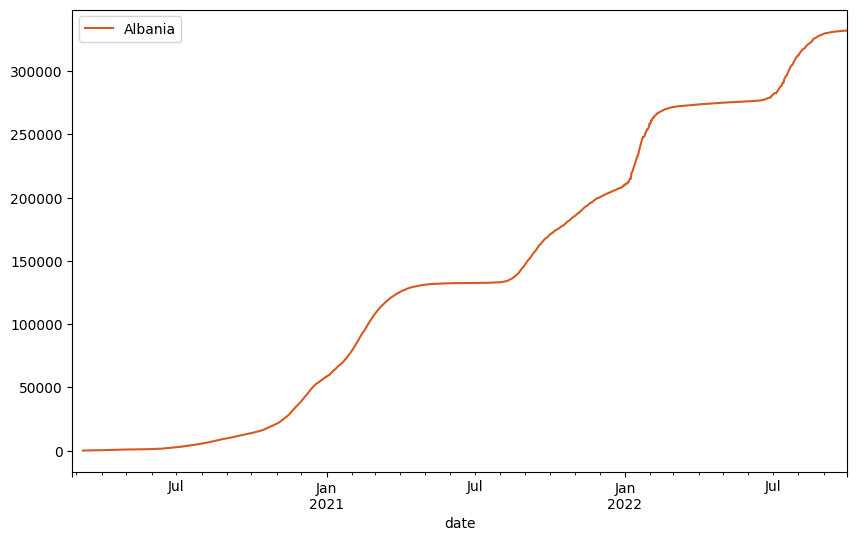

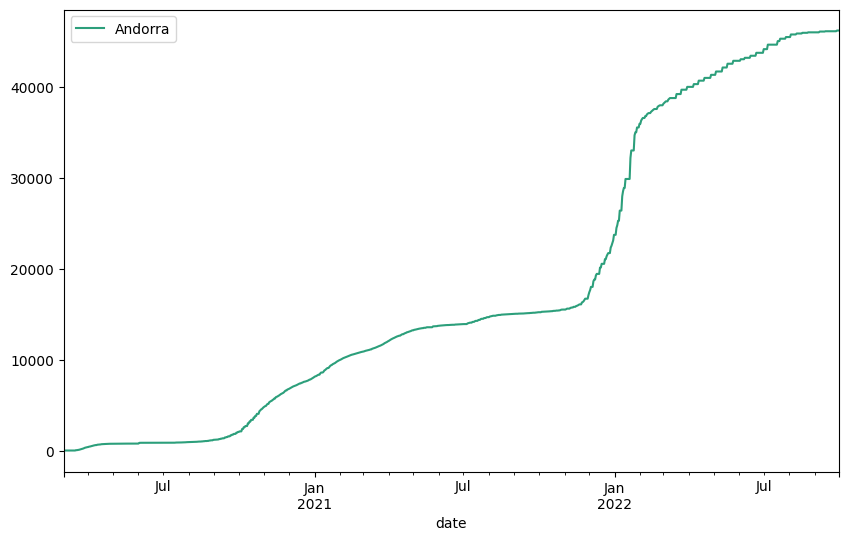

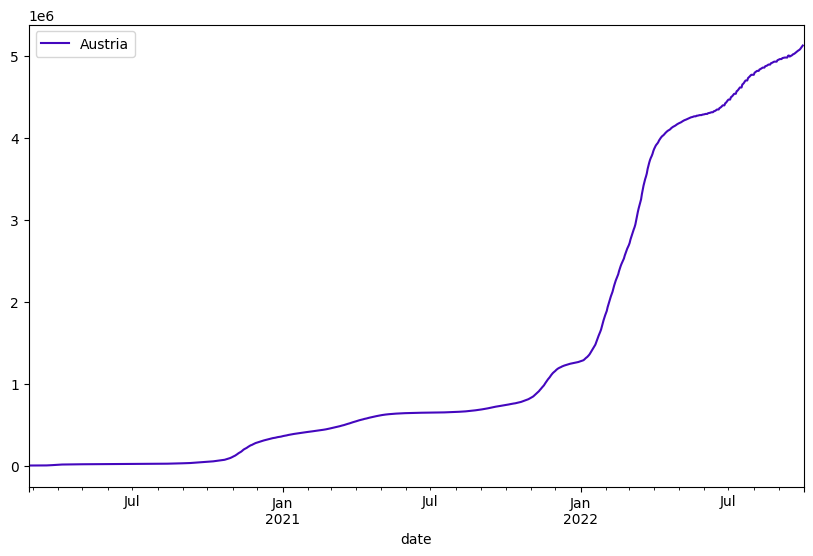

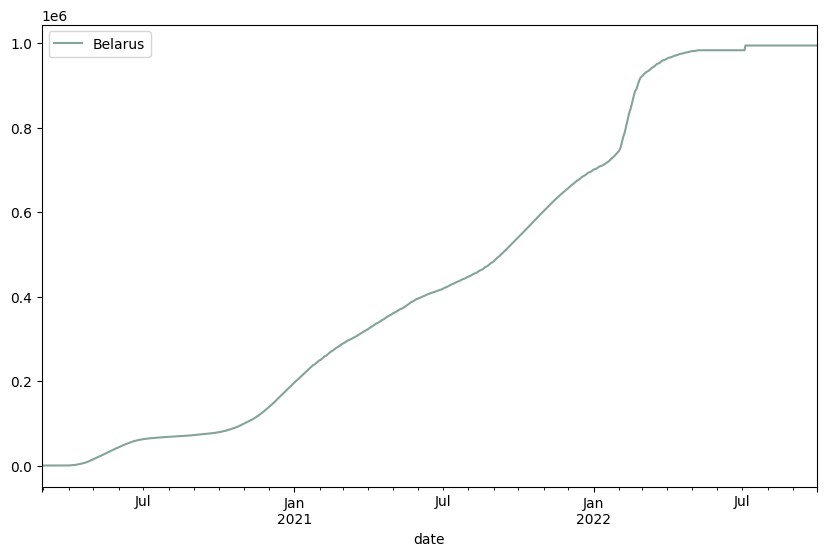

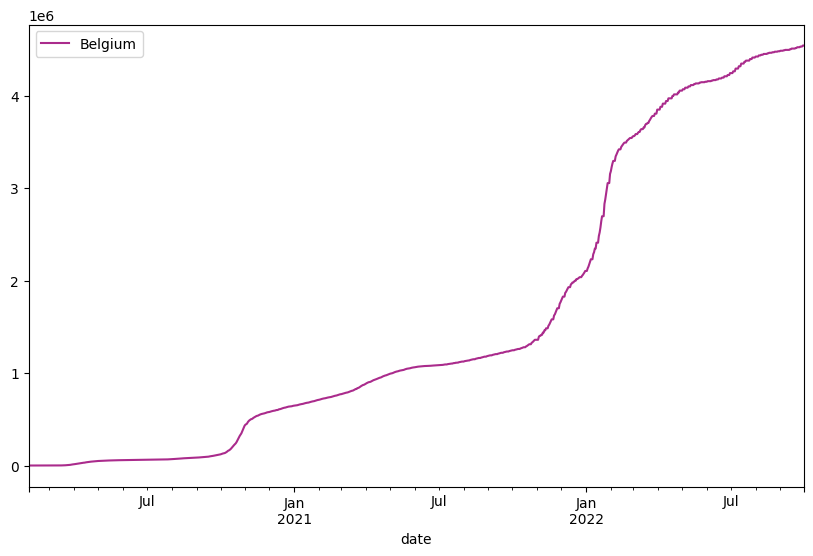

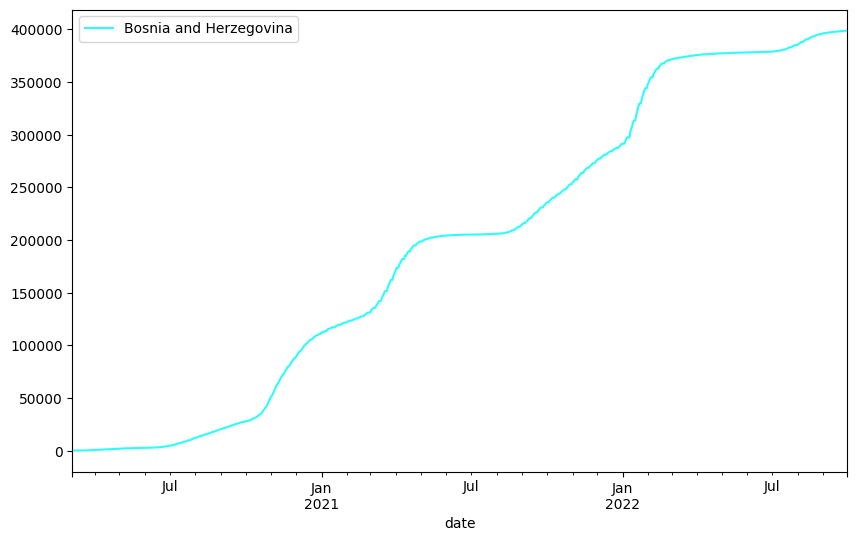

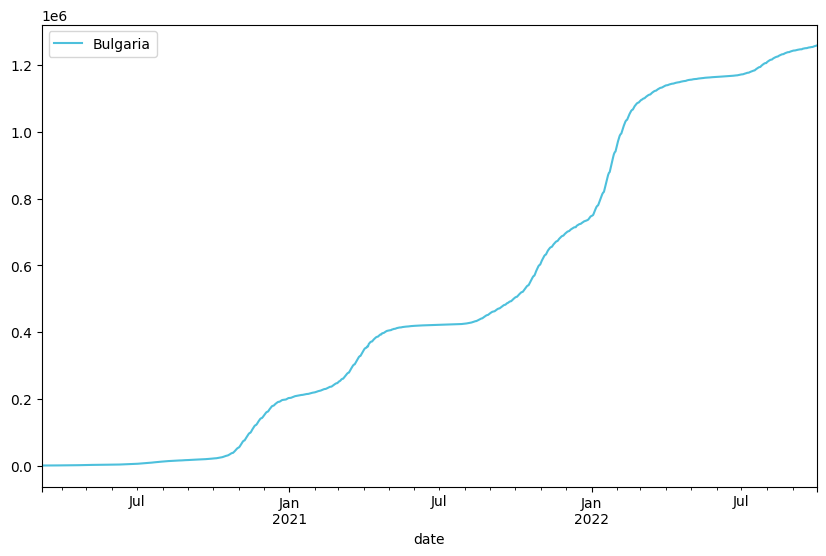

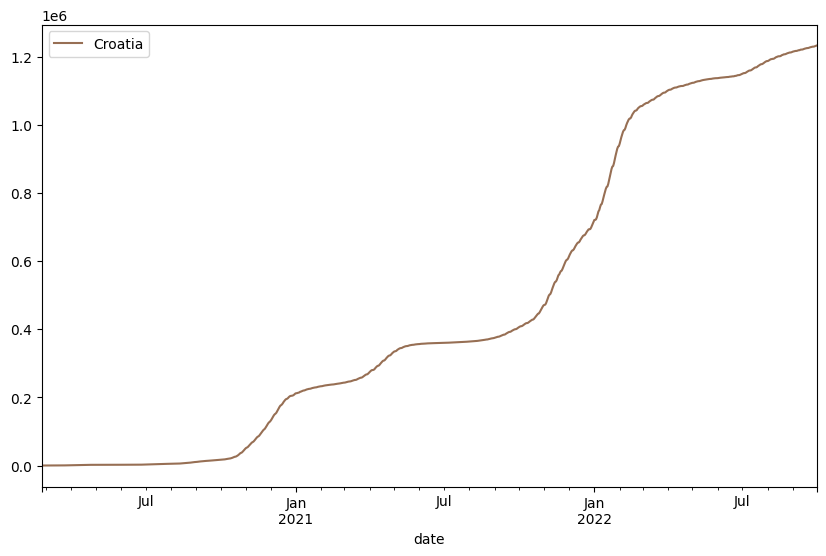

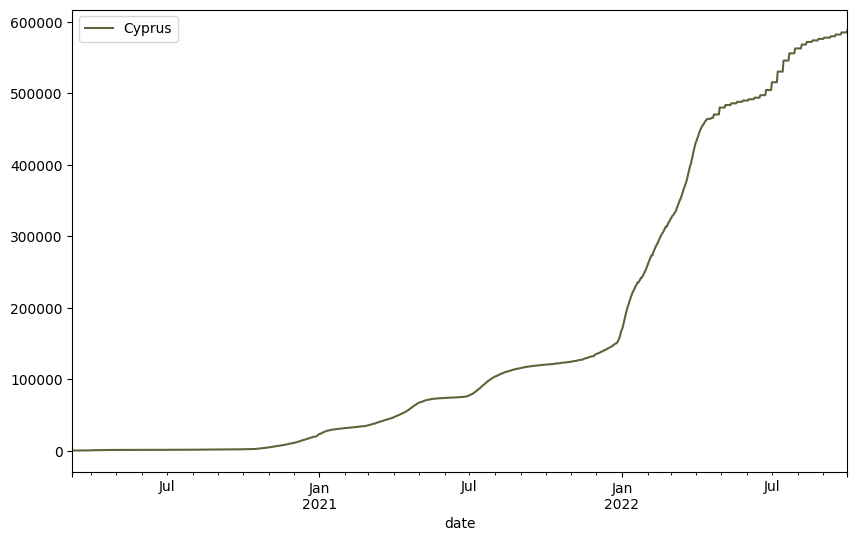

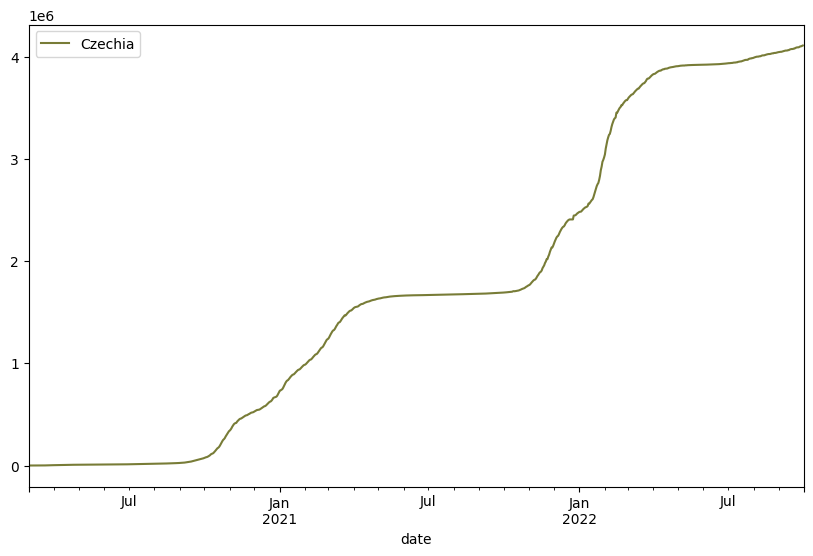

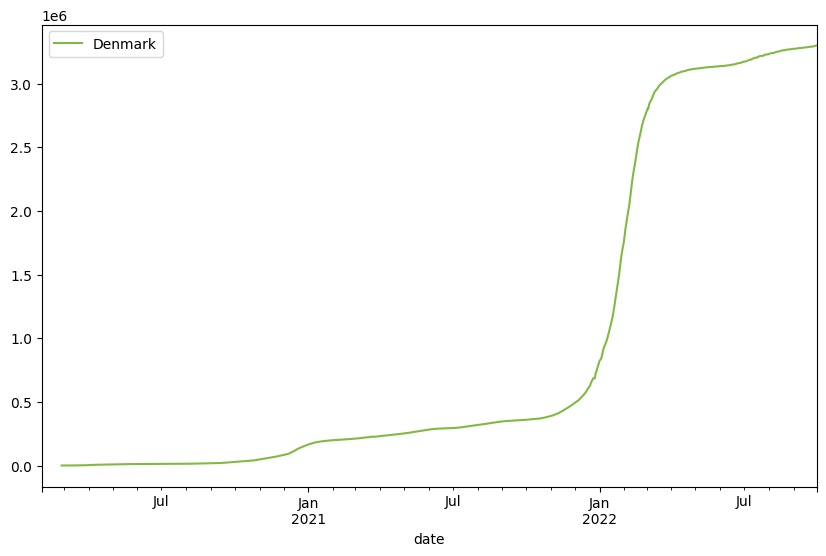

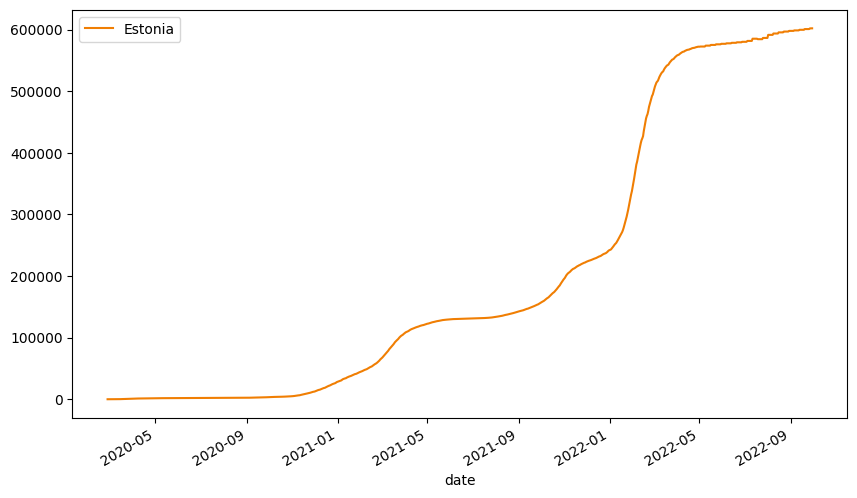

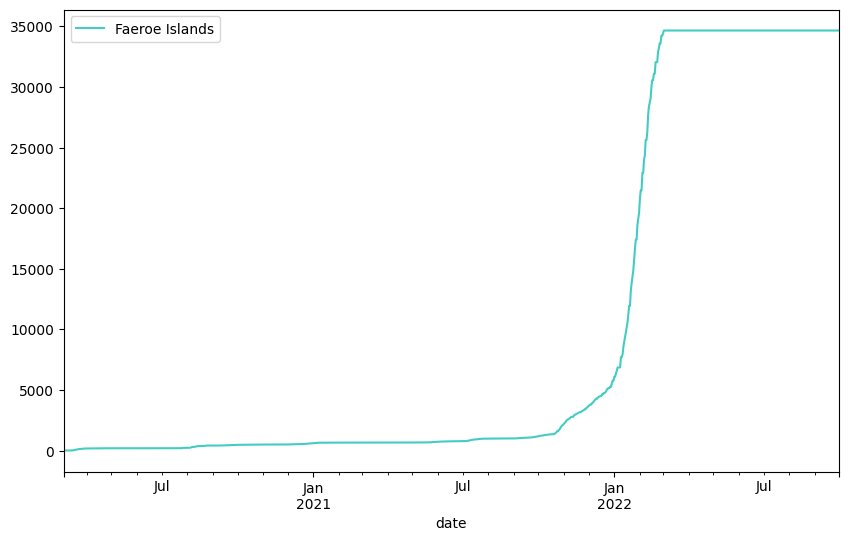

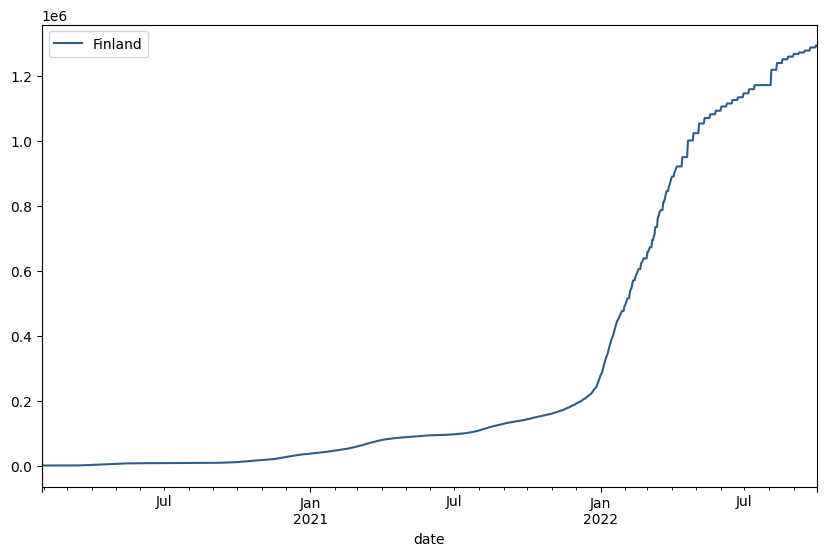

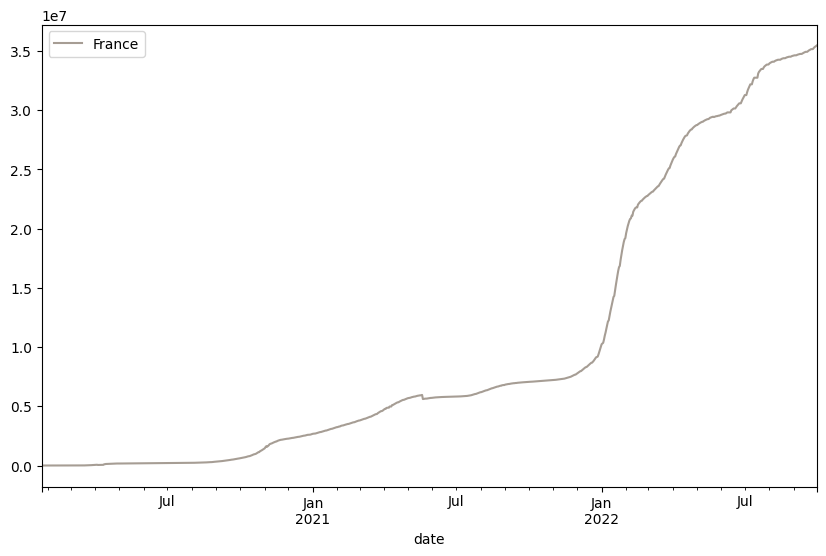

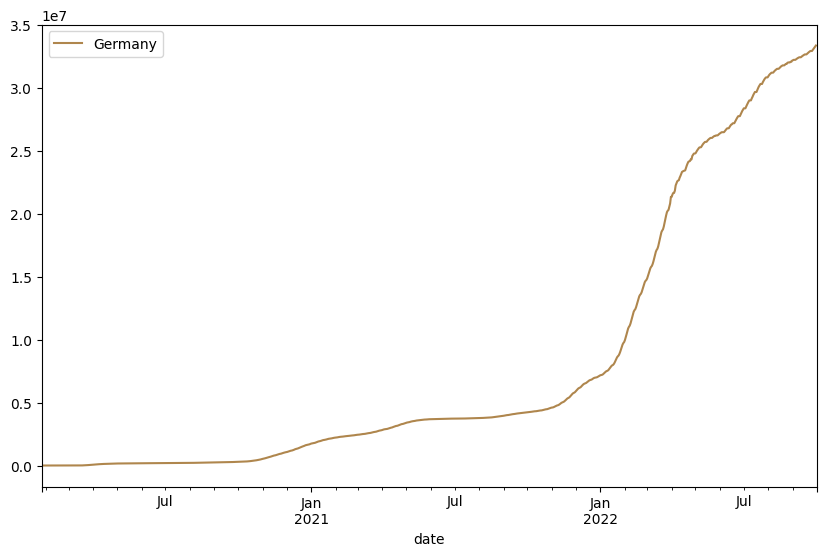

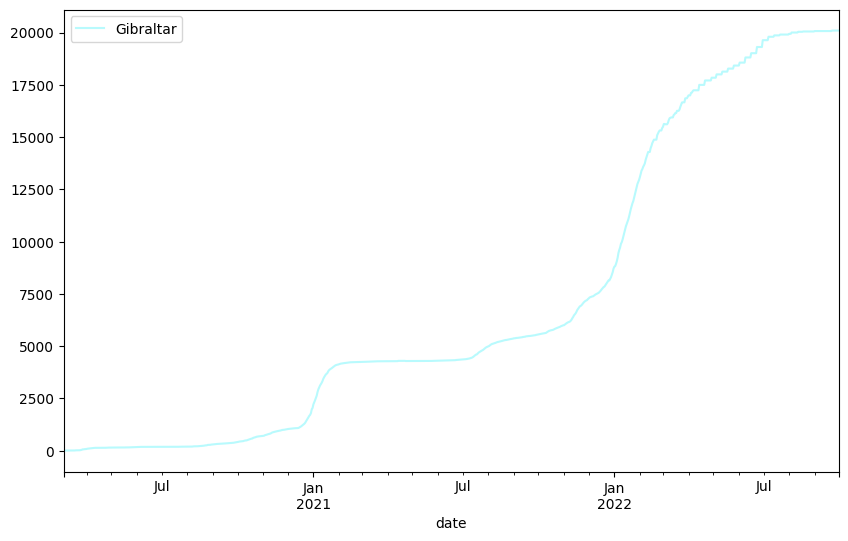

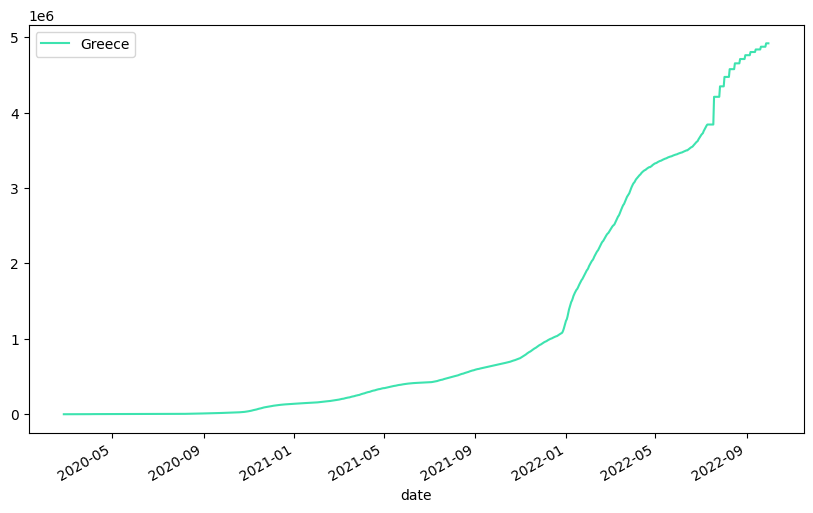

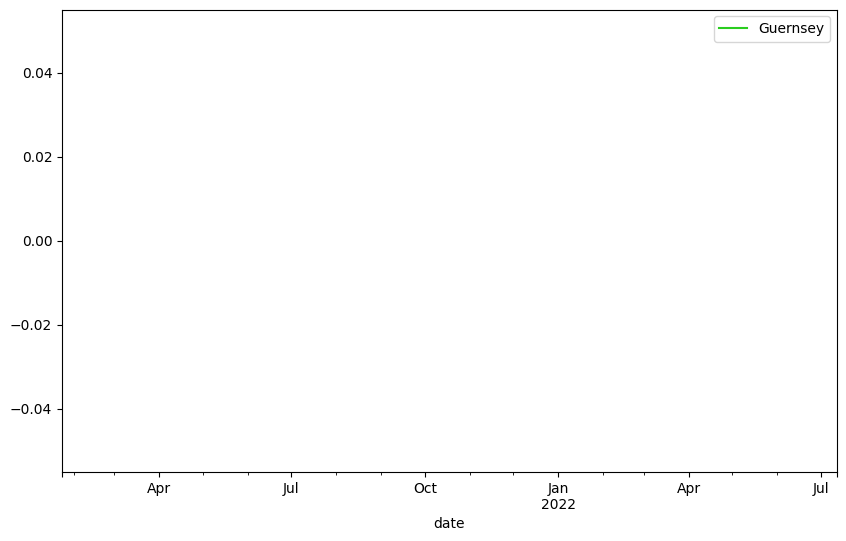

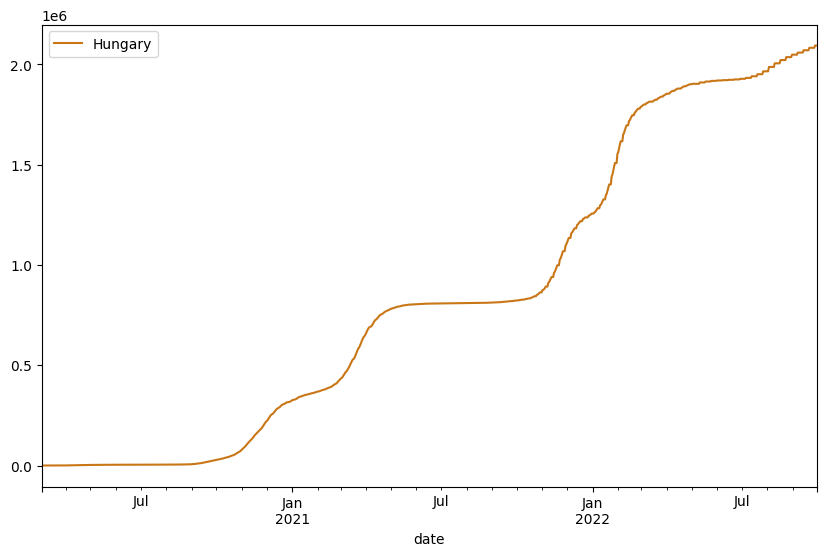

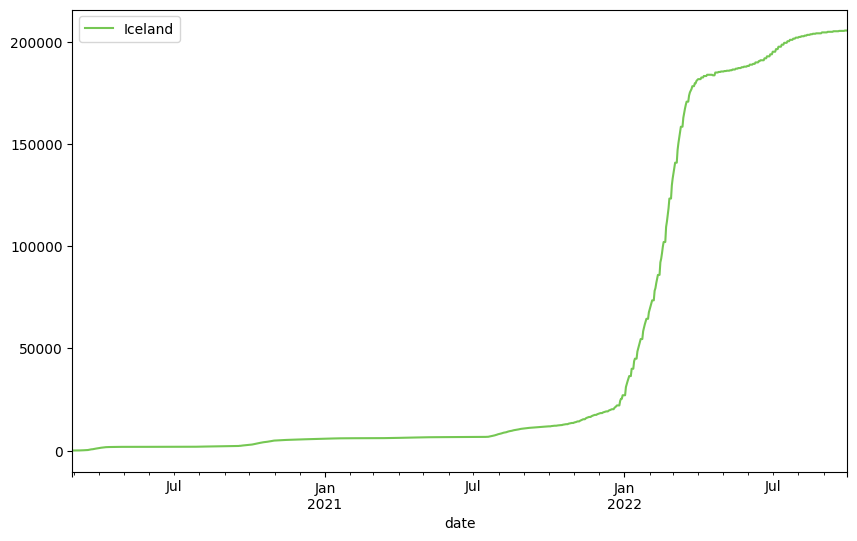

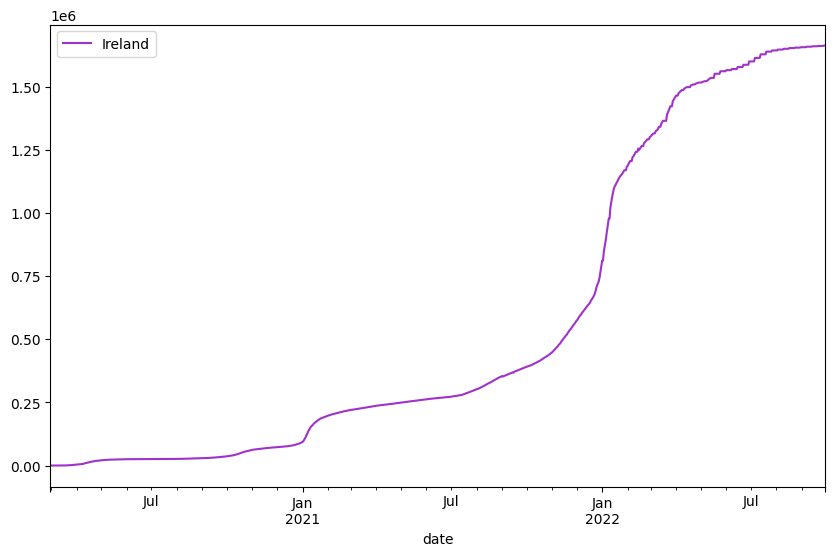

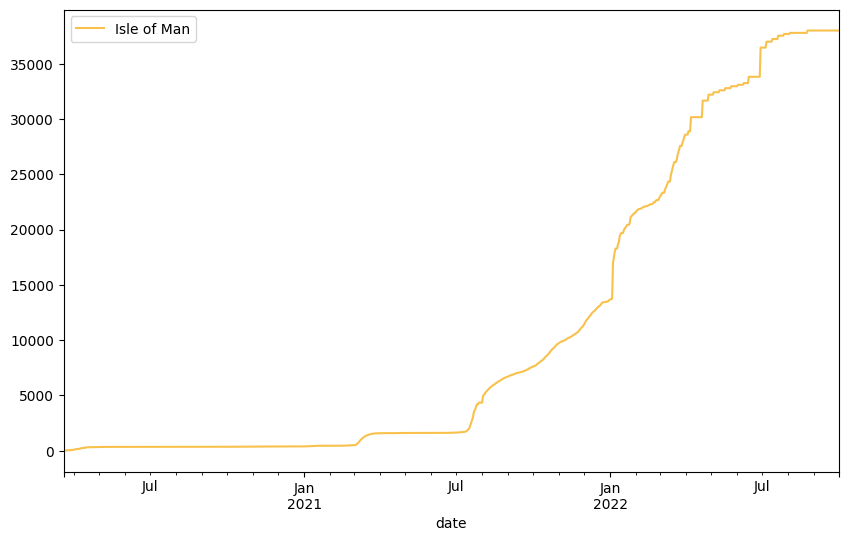

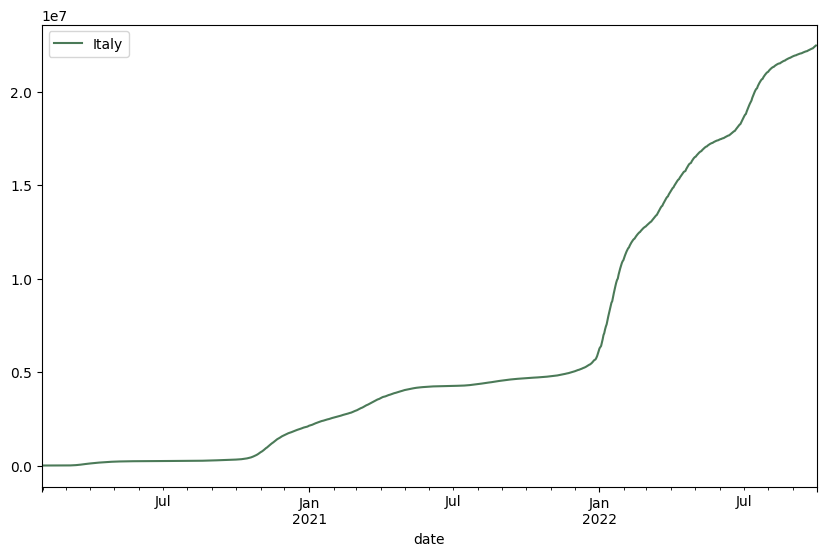

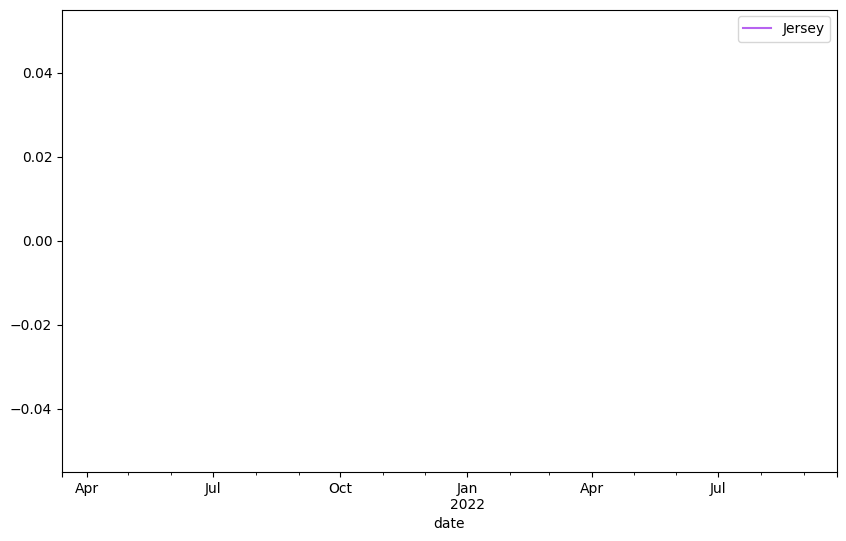

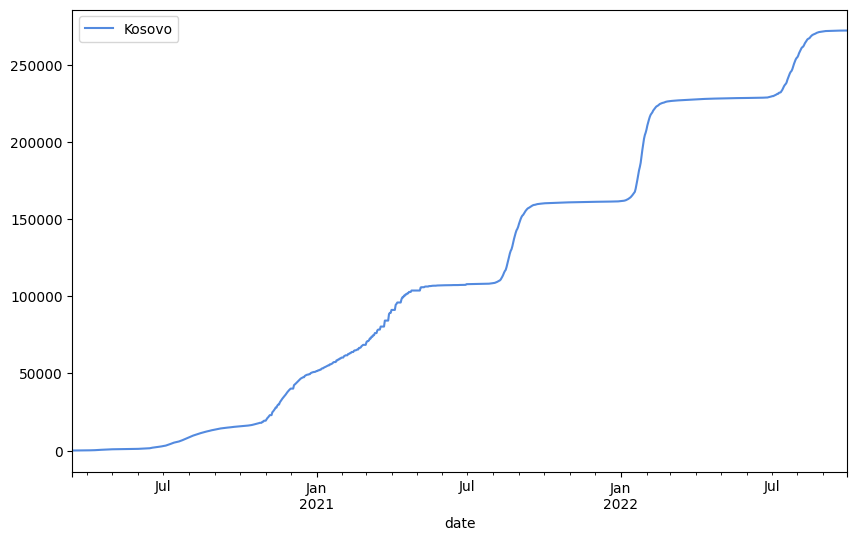

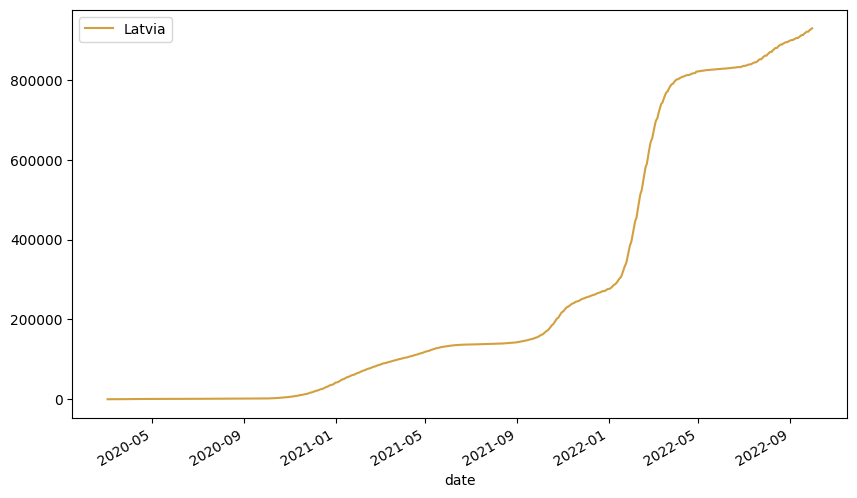

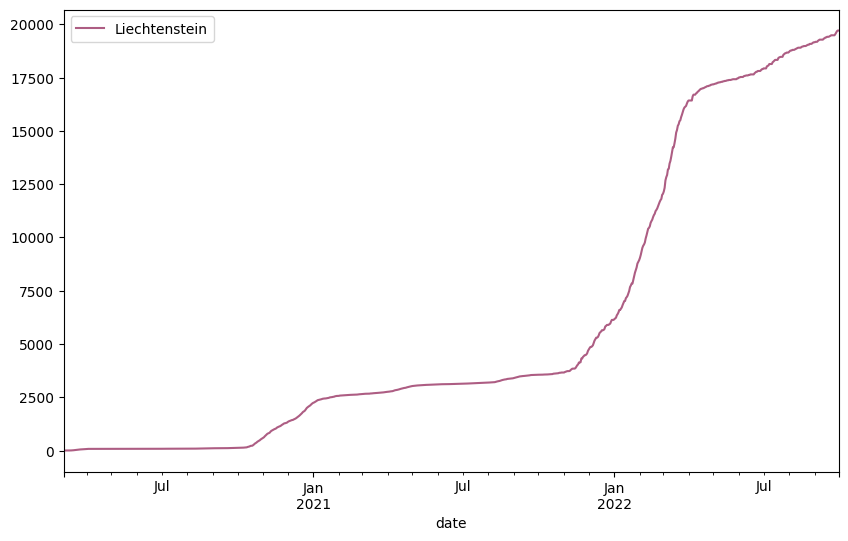

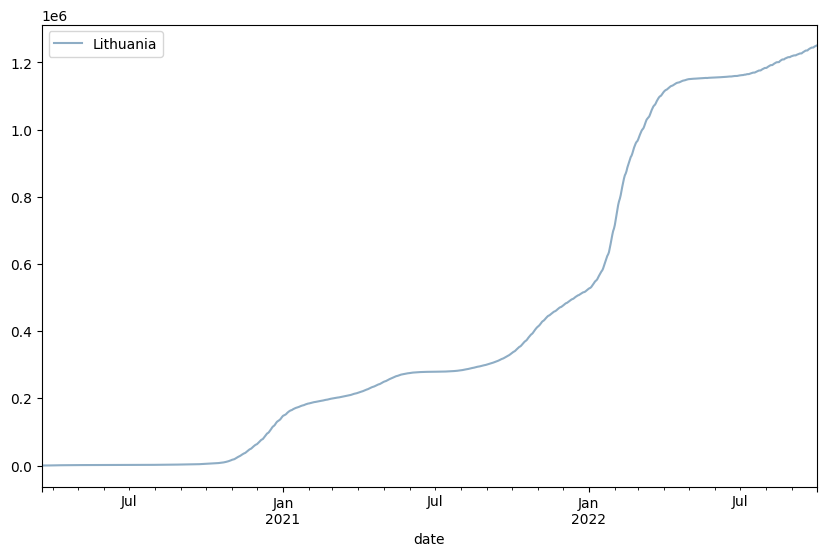

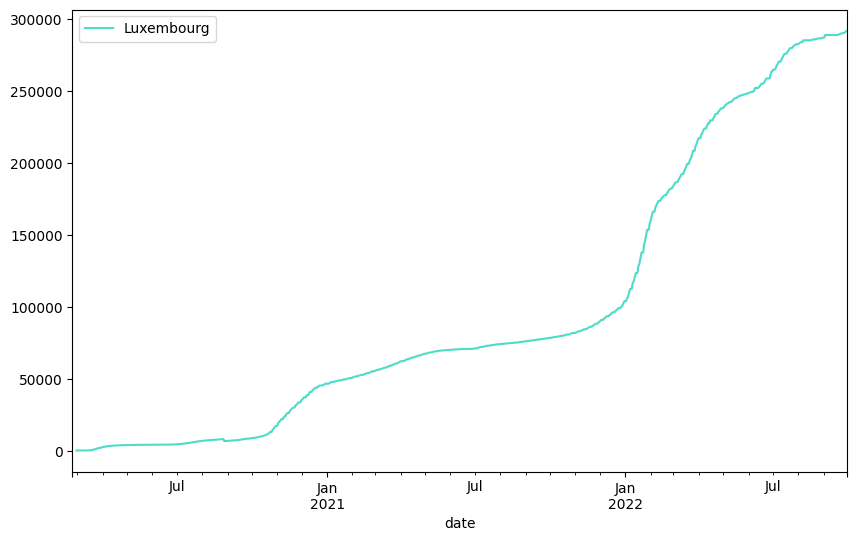

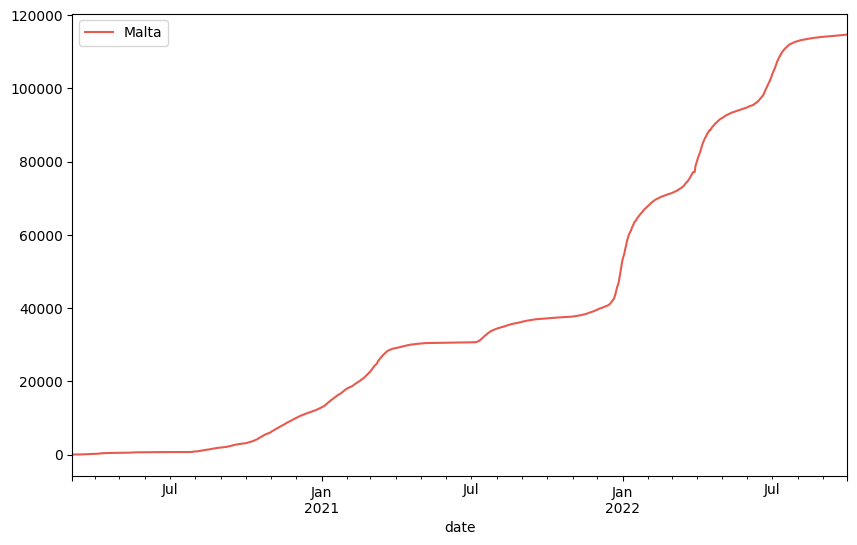

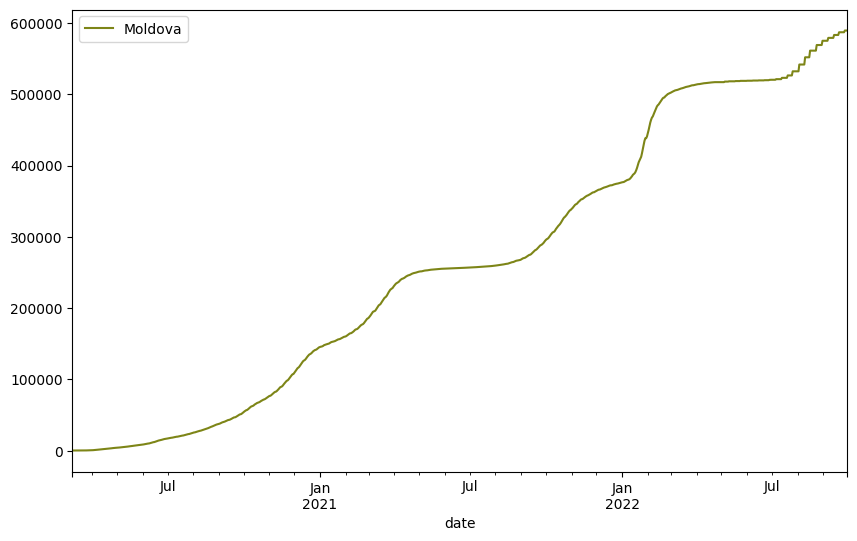

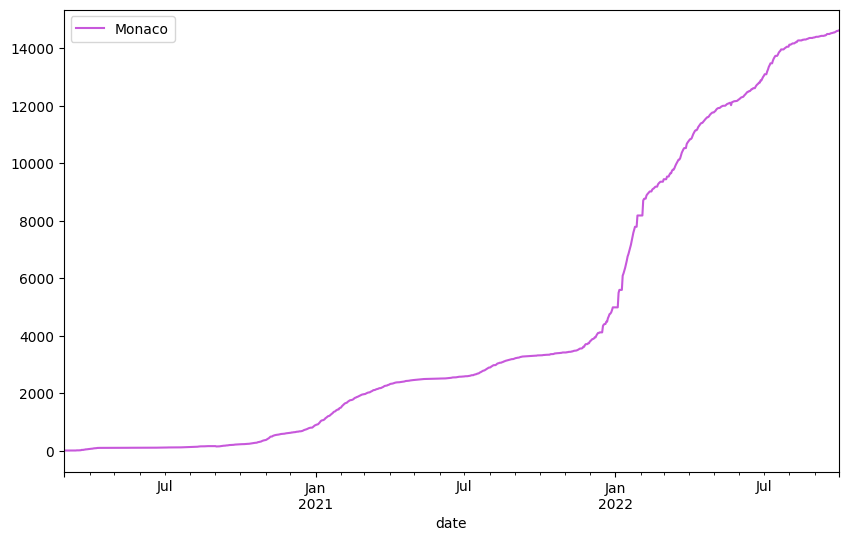

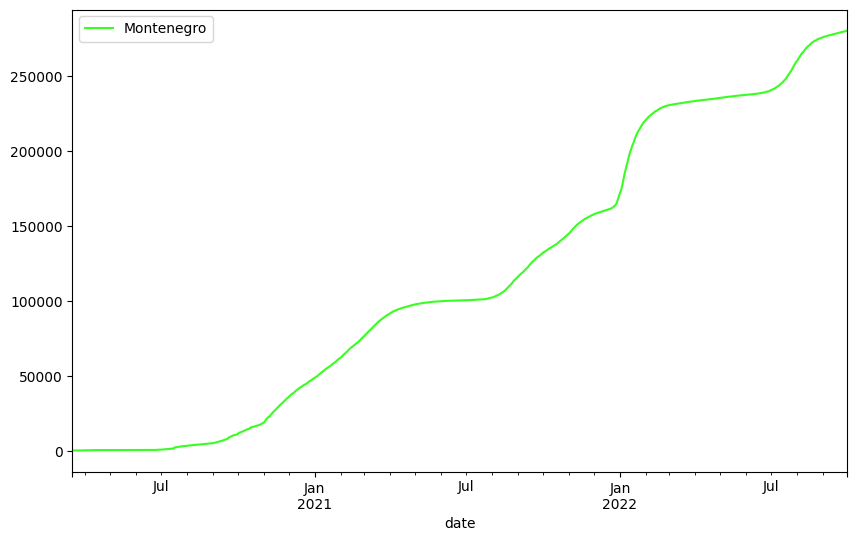

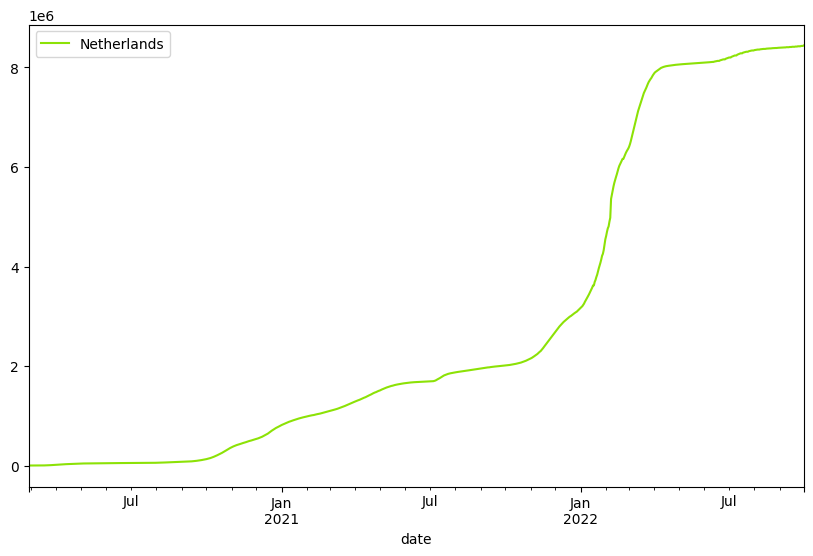

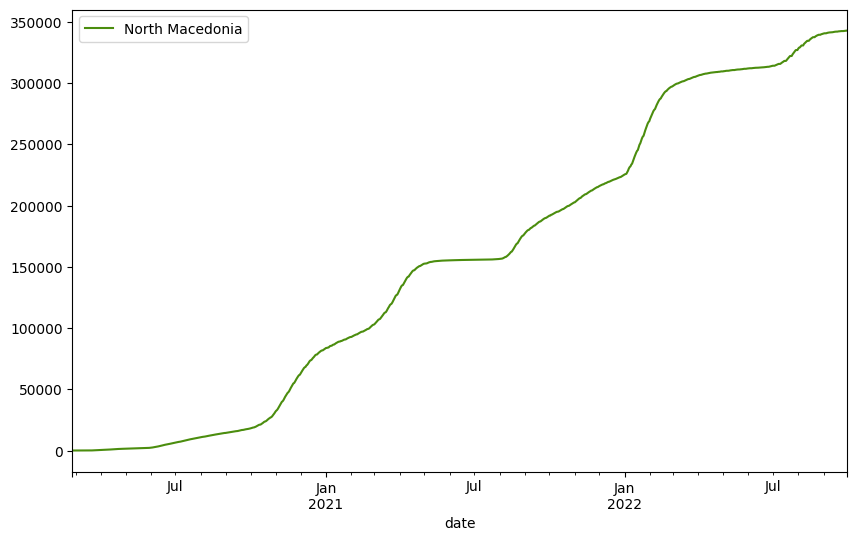

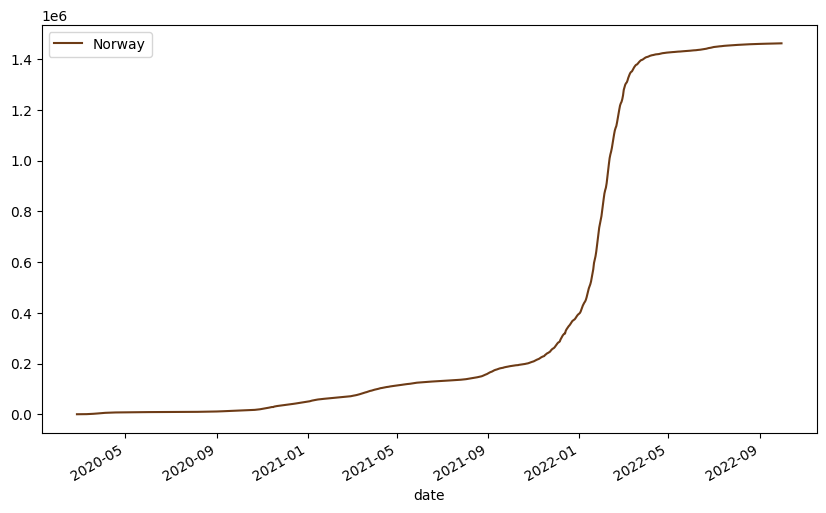

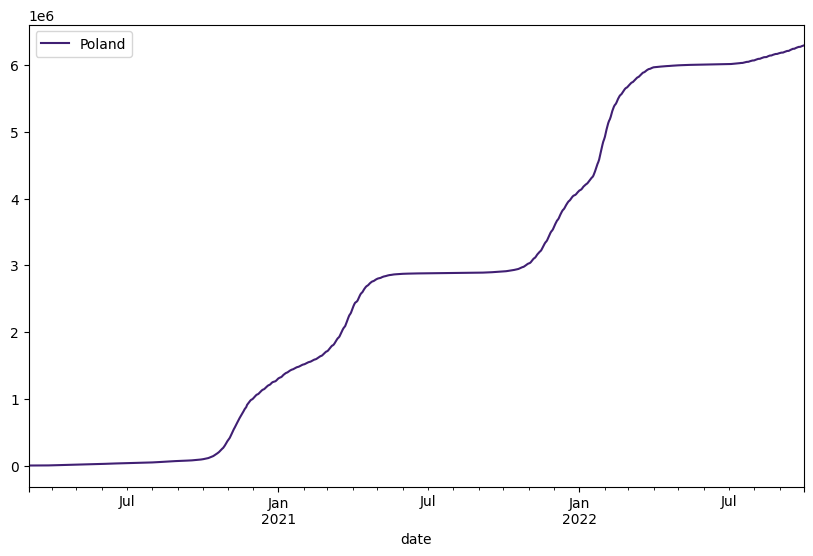

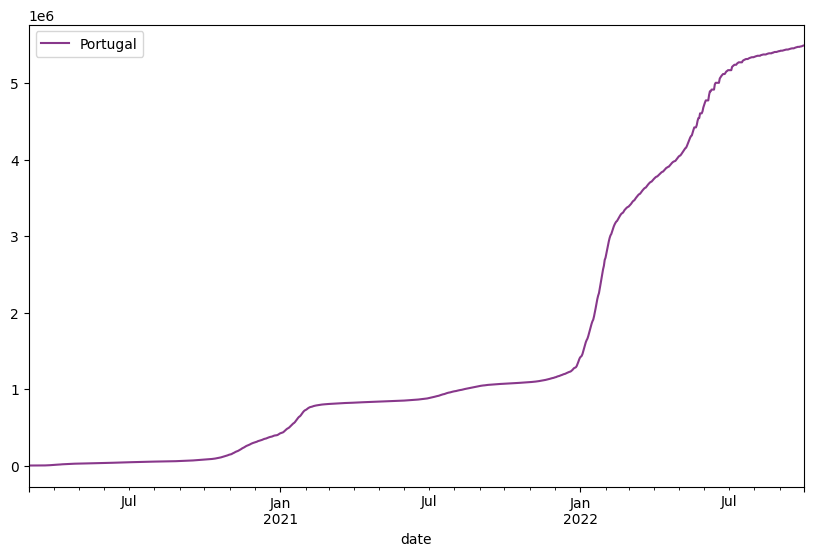

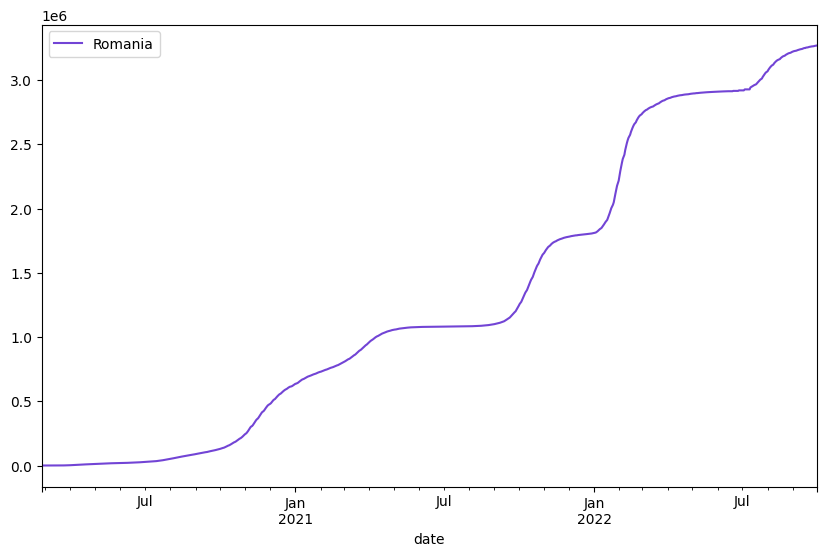

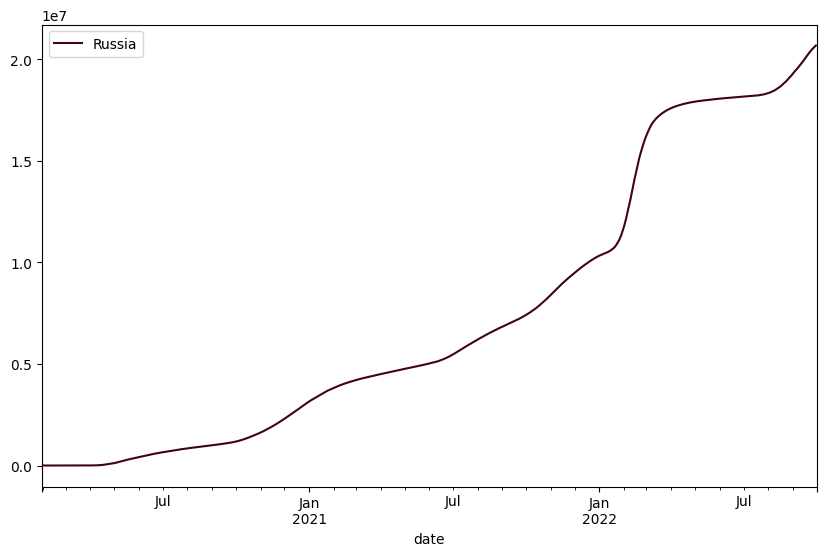

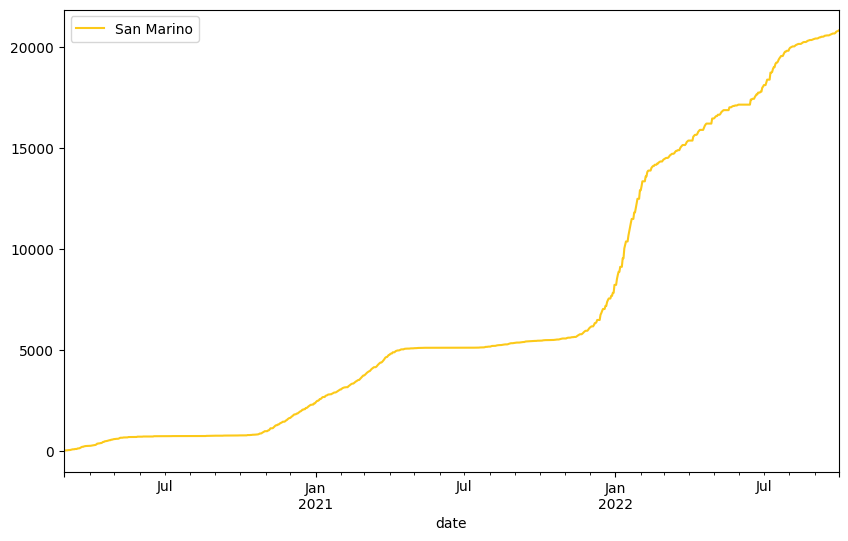

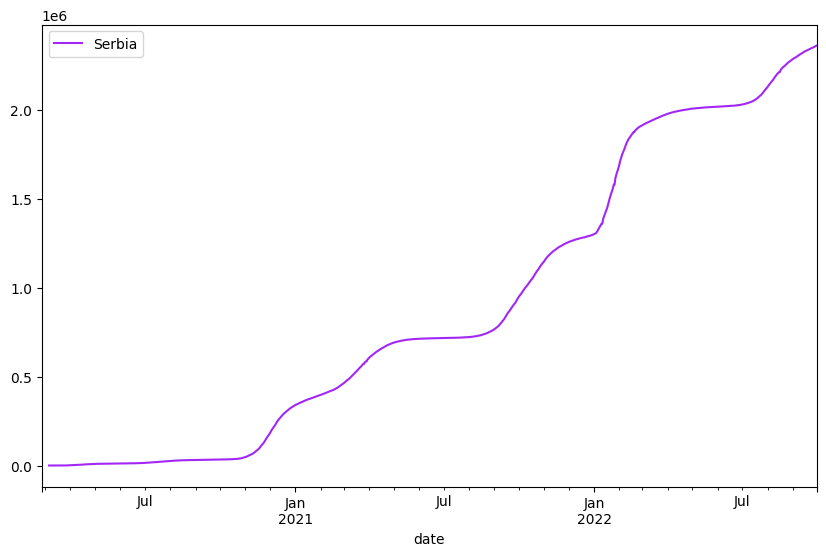

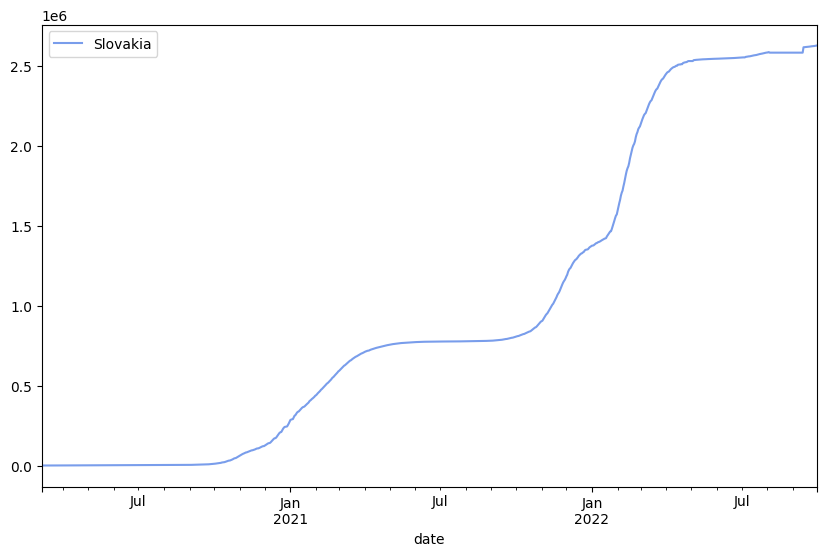

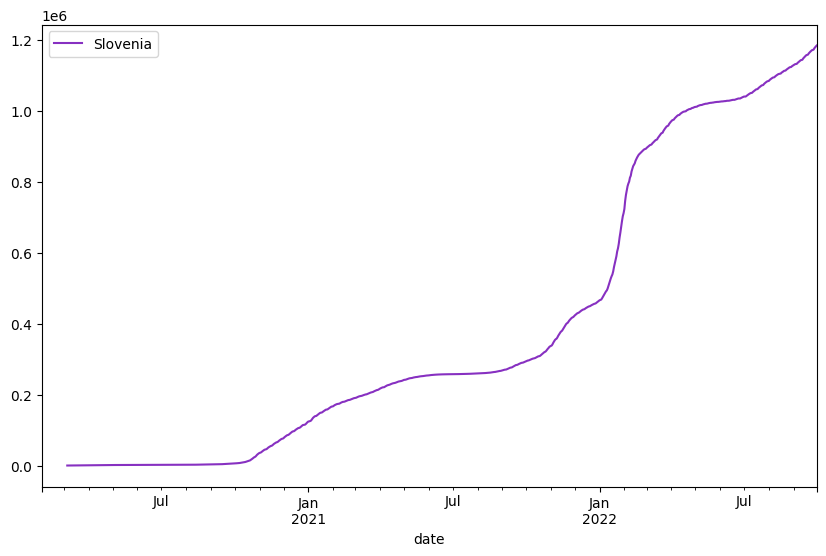

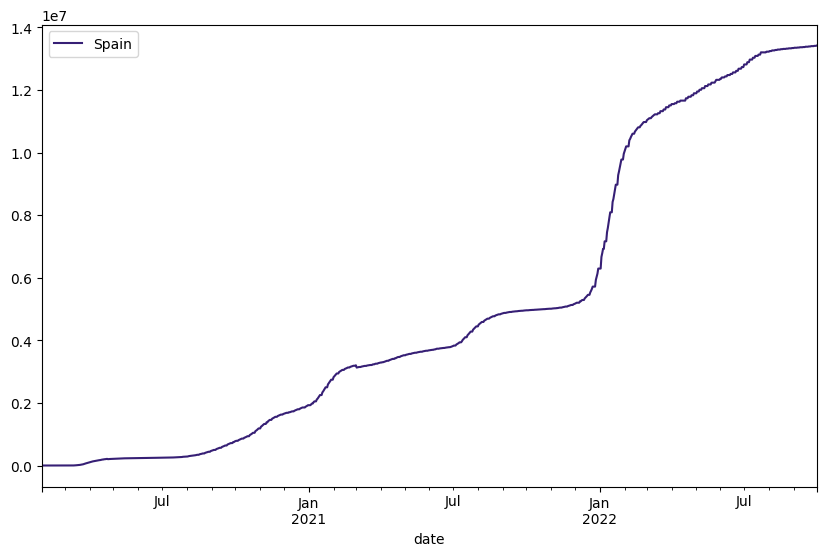

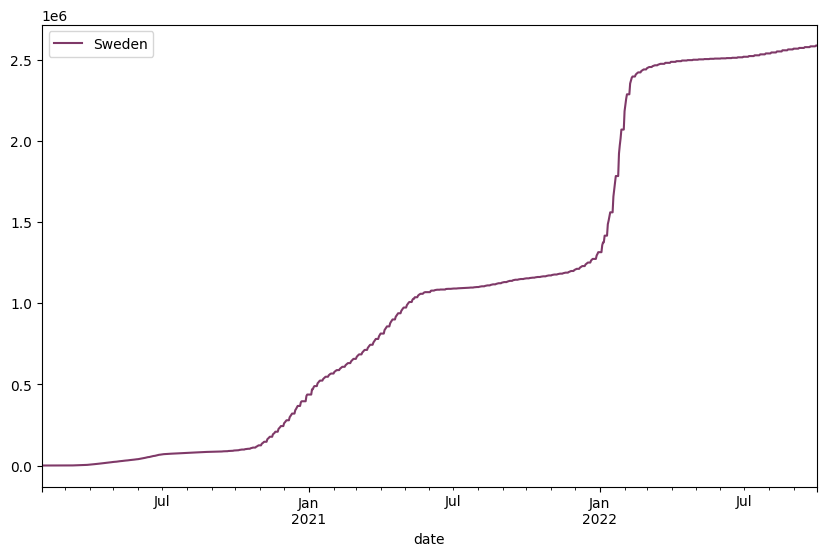

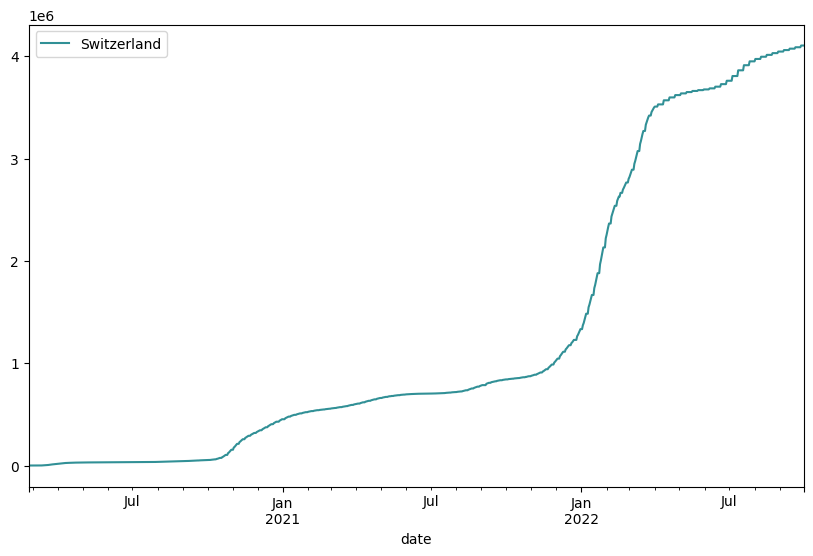

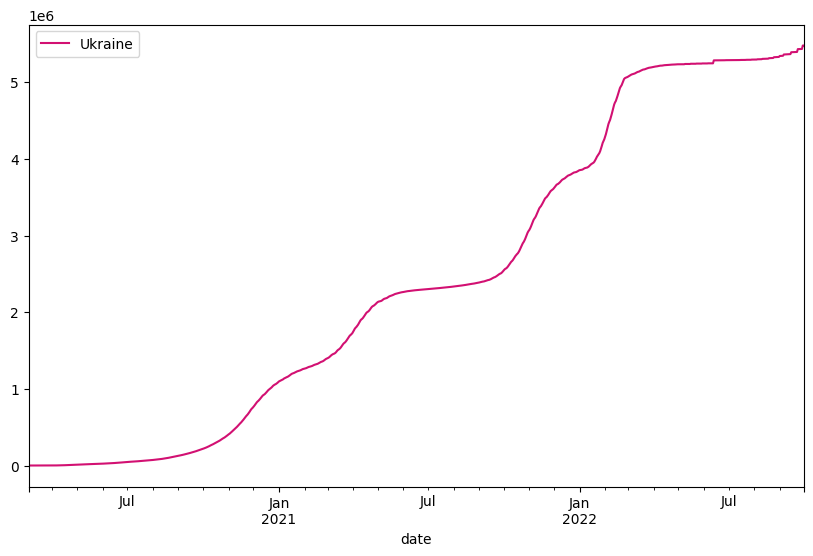

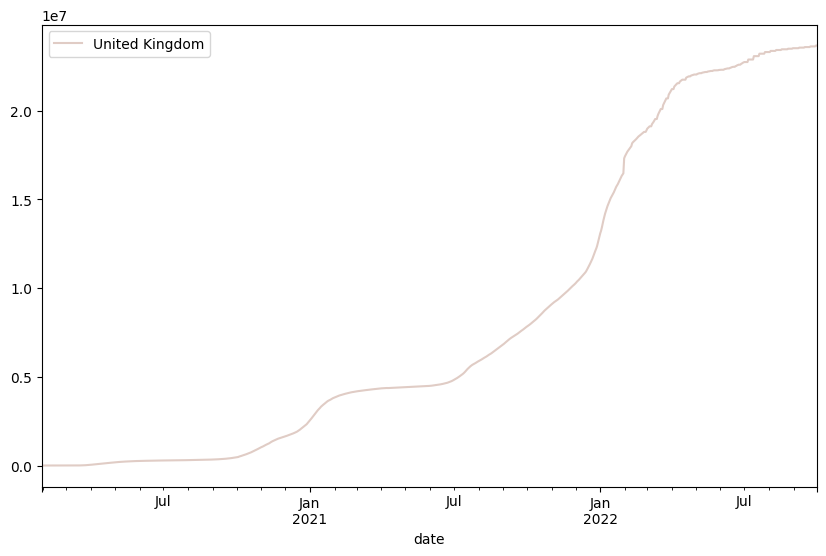

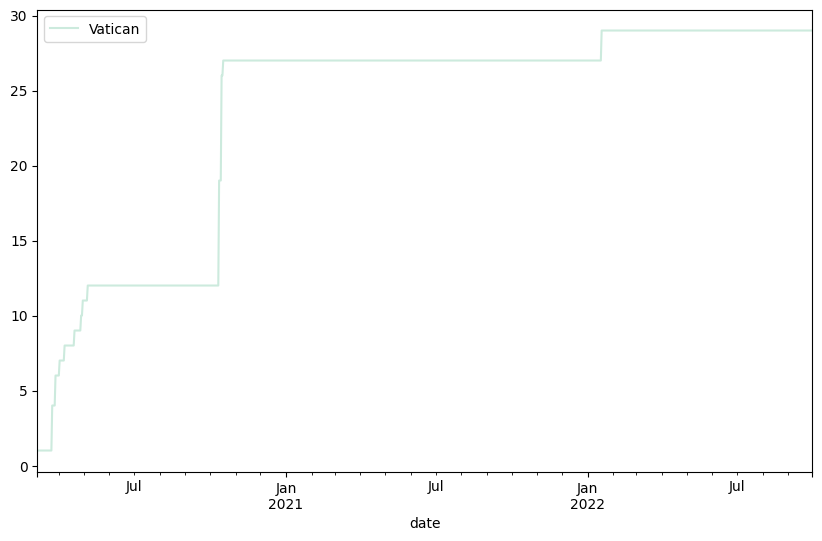

In [67]:

for i, (name, group) in enumerate(paises):
    color = (random.random(), random.random(), random.random());
    group.plot(x='date', y='total_cases', label=name ,color = color,figsize=(10,6))

plt.legend()
plt.show()


### Analisis de las graficas

 Por cada una de estas graficas podermos ver el total de casos en cada pais de Europa desde el comiezo de la pandemia. (no estan todas las graficas en un mismo plot porque la visualizacion no era la mejor, de manera individual se observa mejor el incremento y decrecimiento de casos por pais)

# Grafico de nuevas muertes por pais 


c:\Users\Ignacio\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


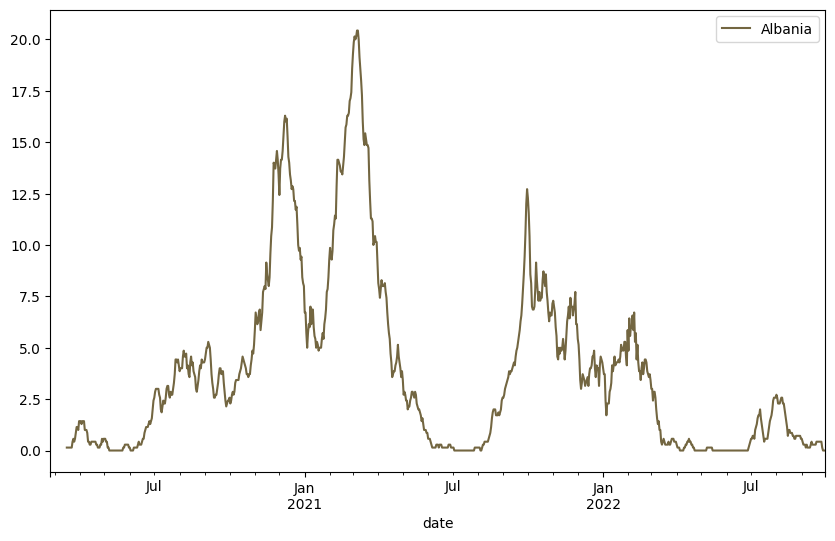

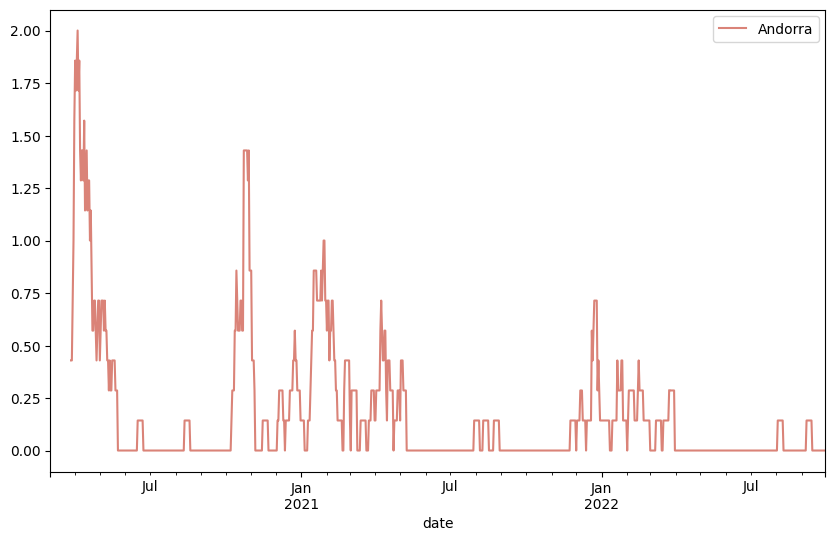

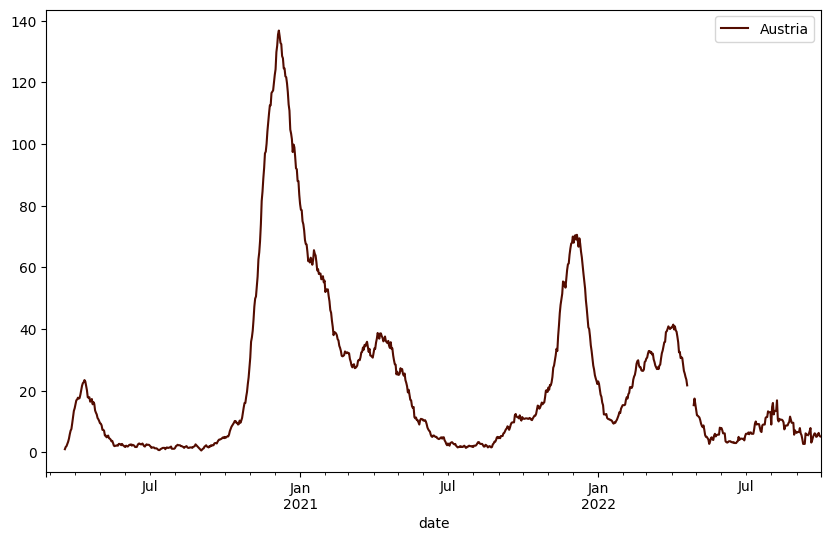

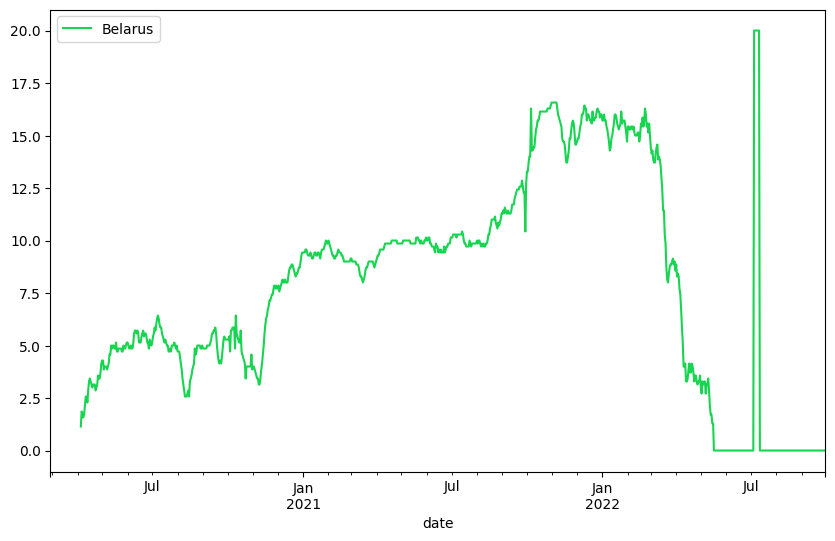

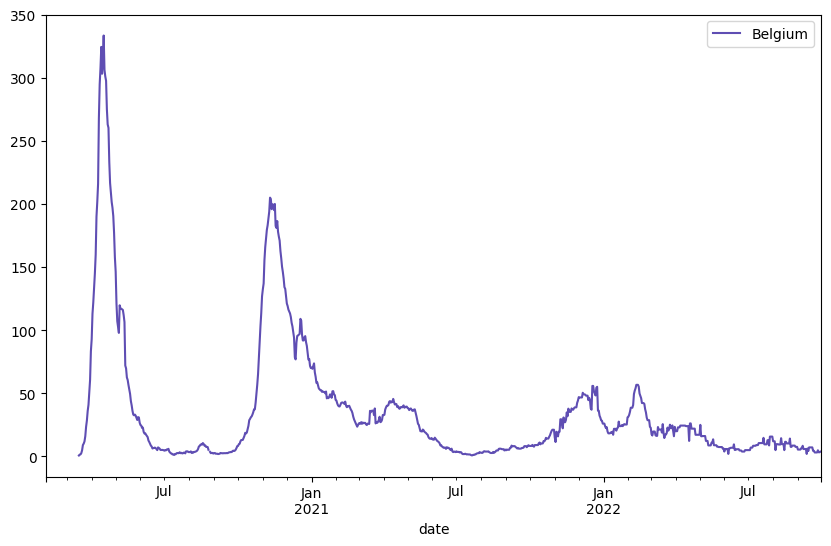

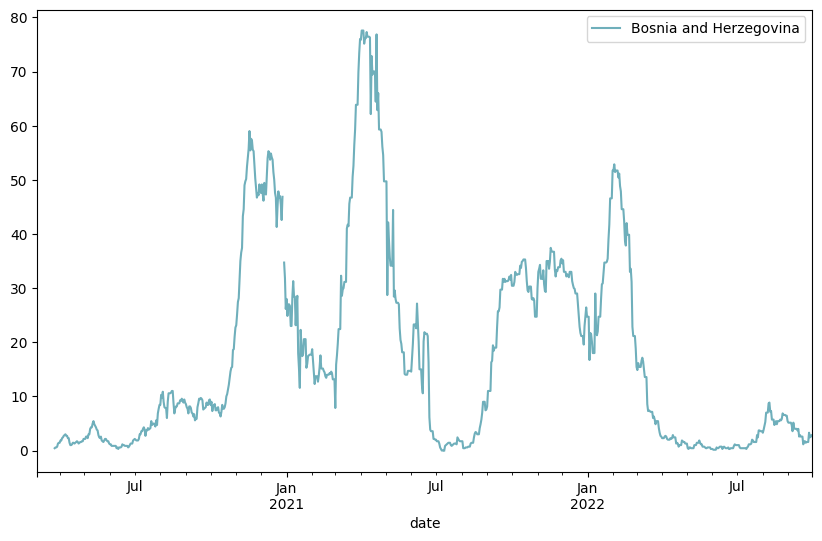

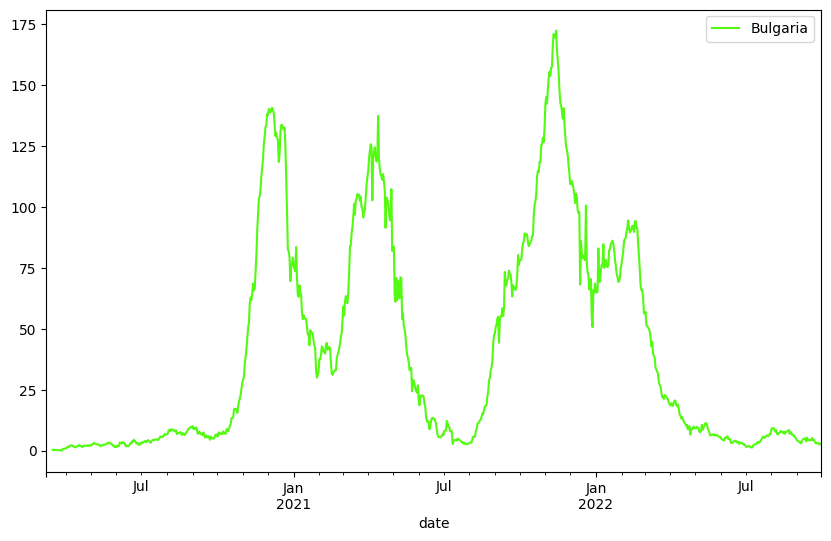

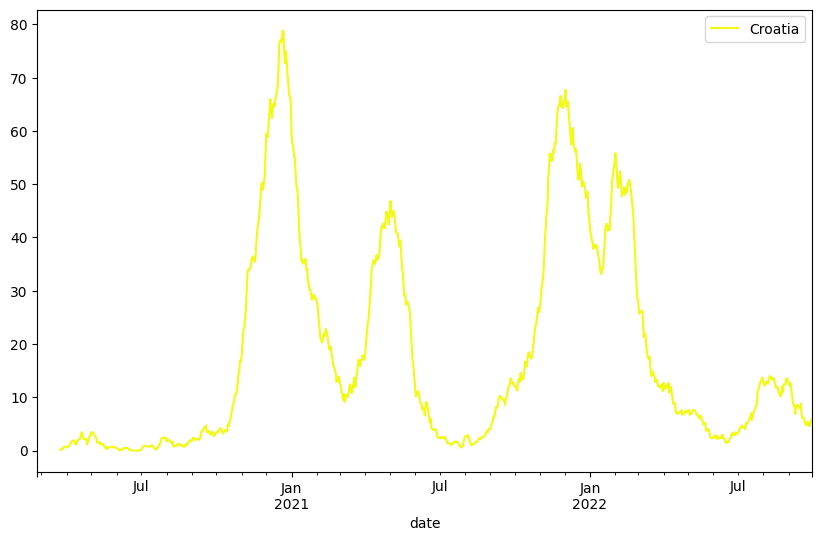

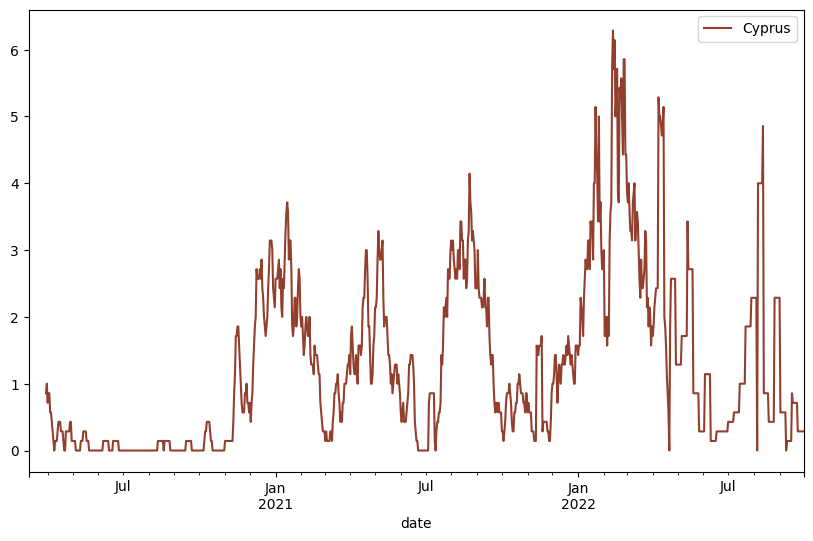

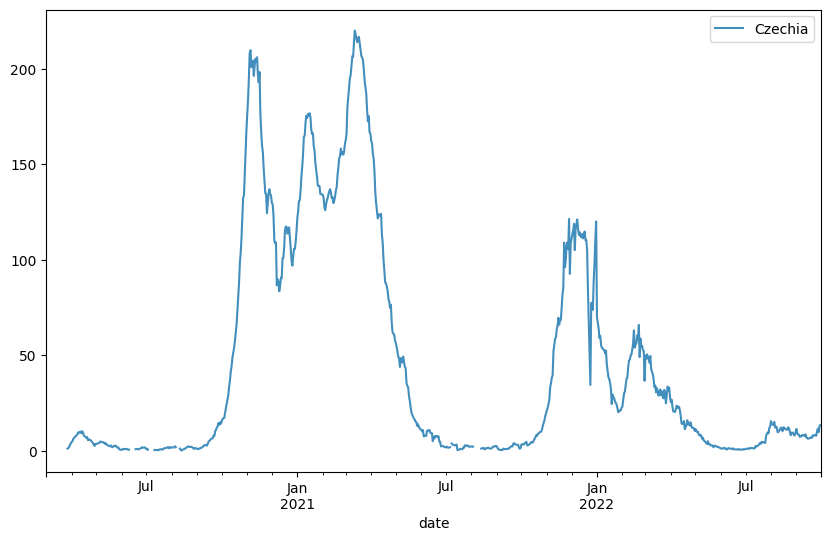

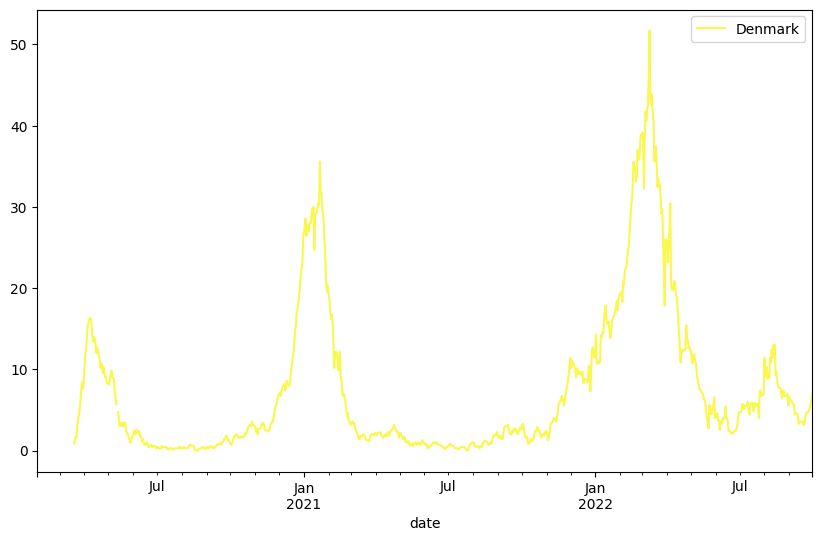

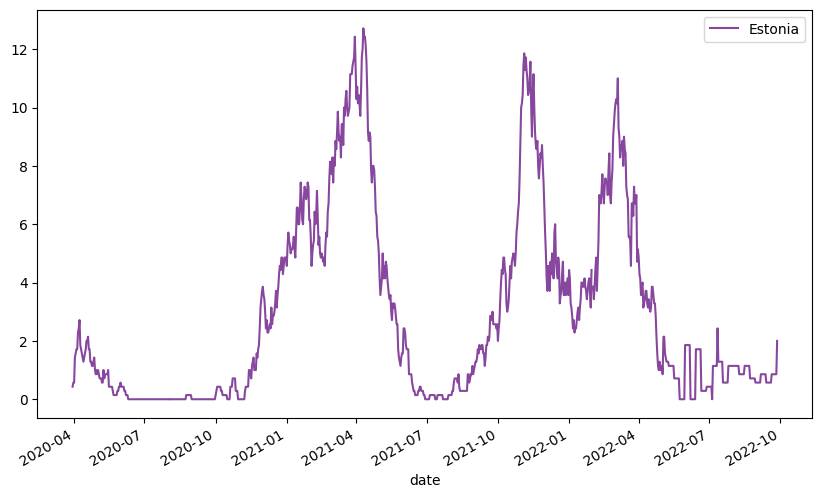

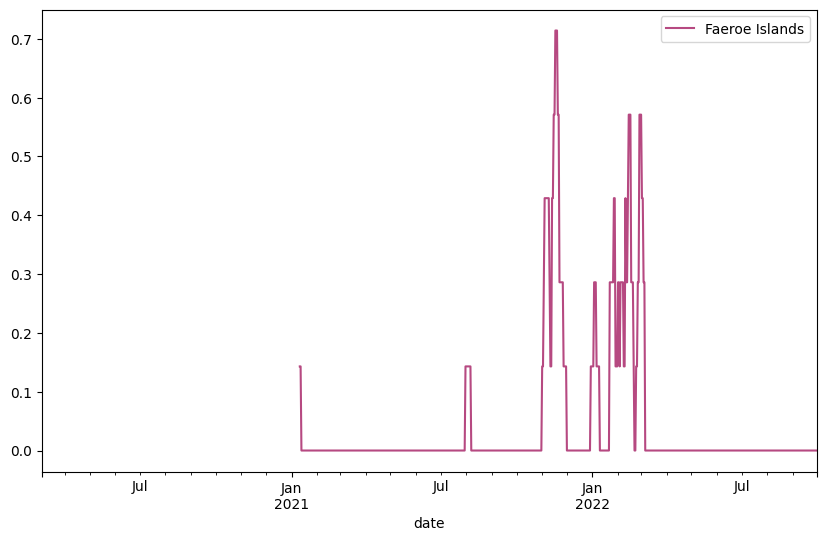

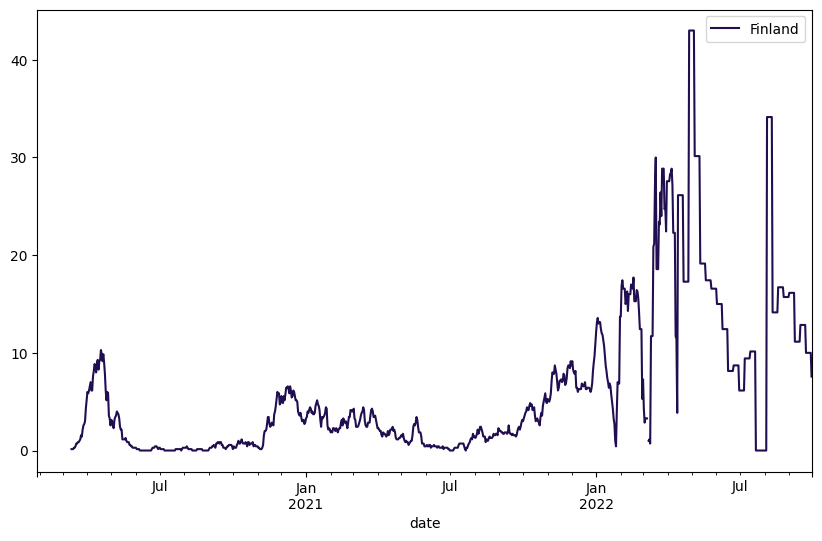

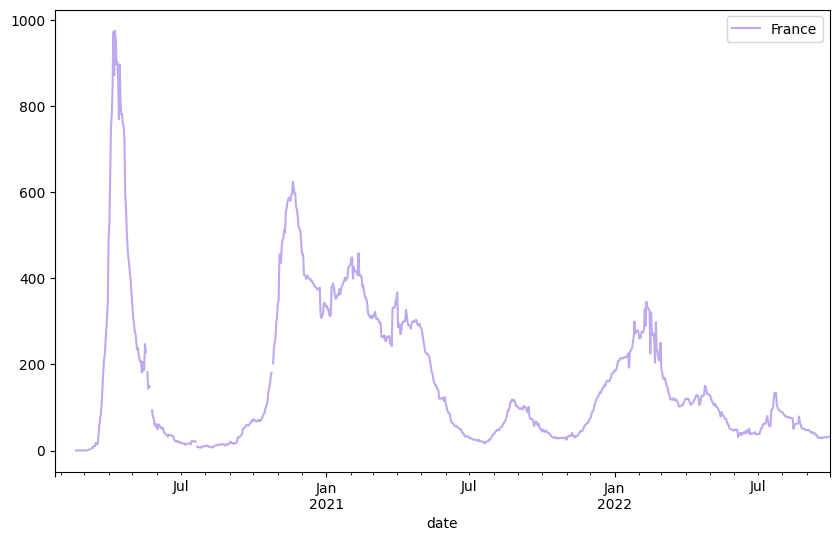

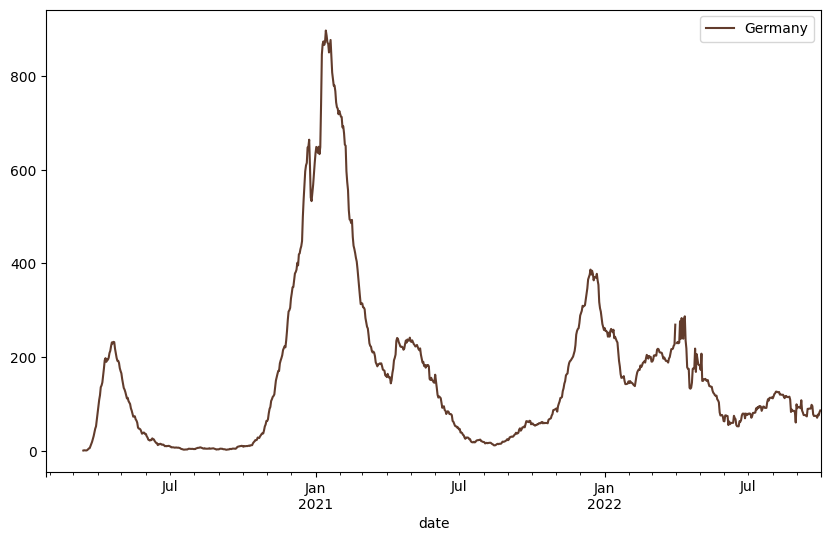

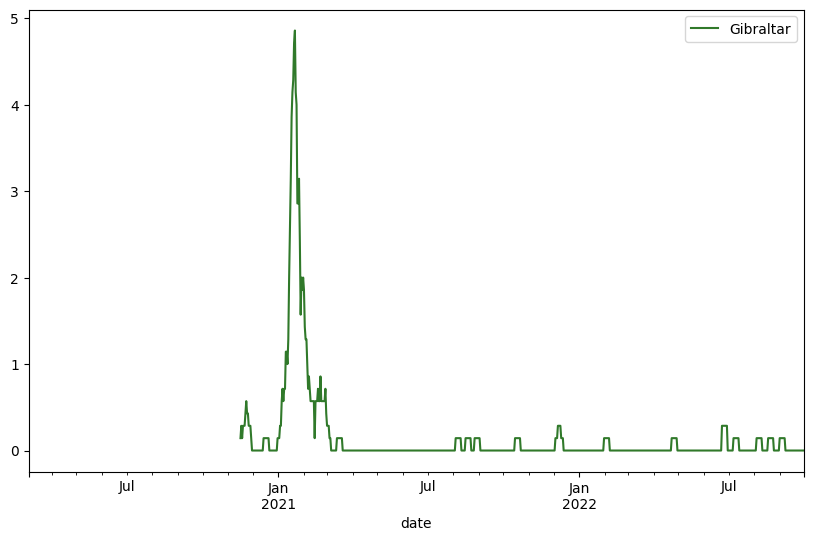

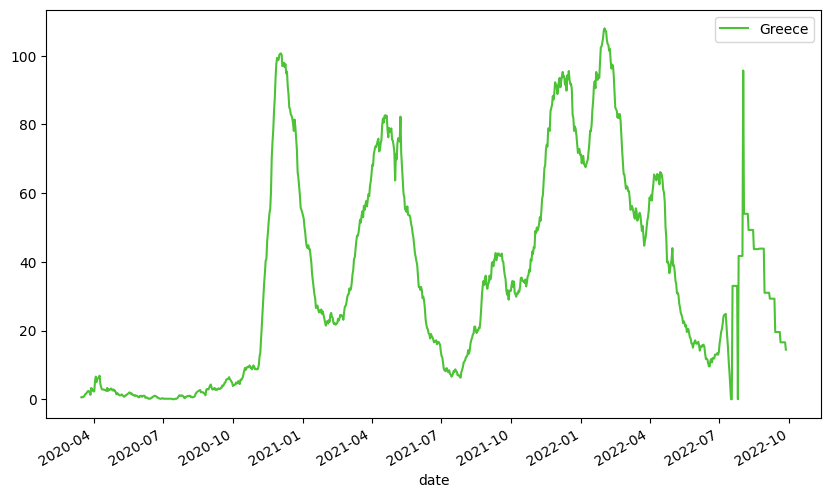

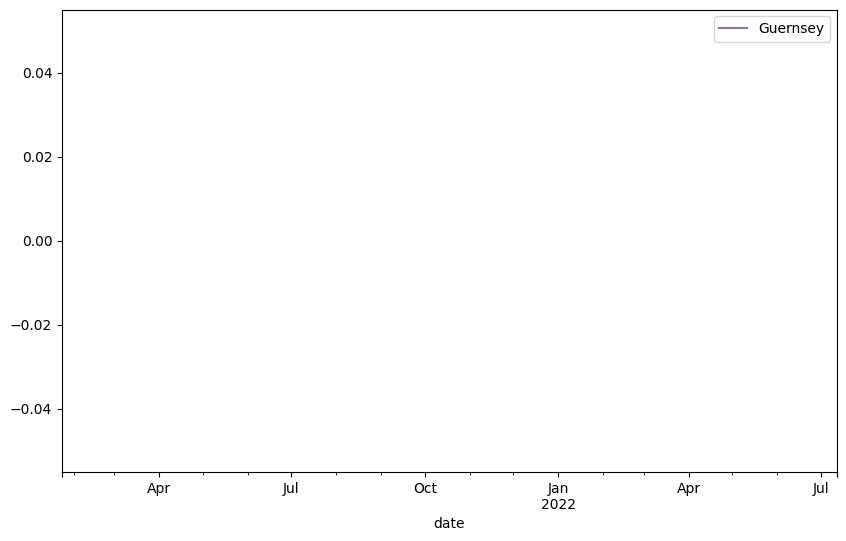

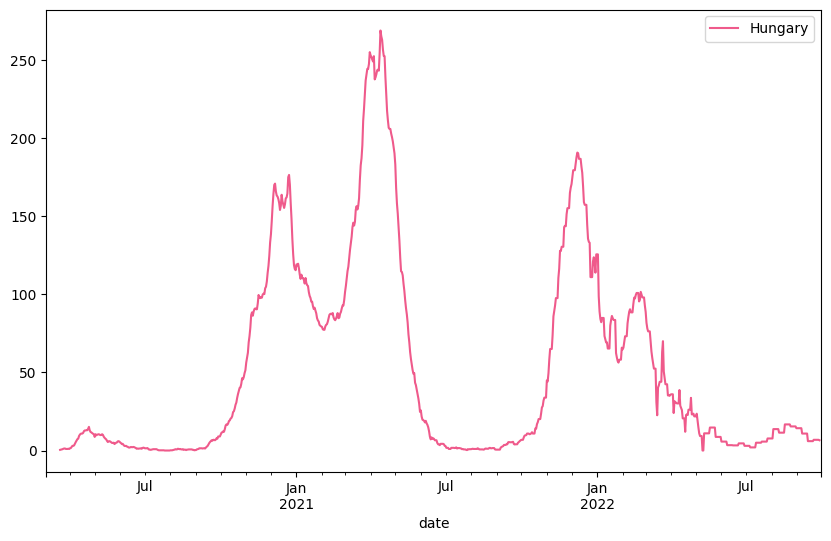

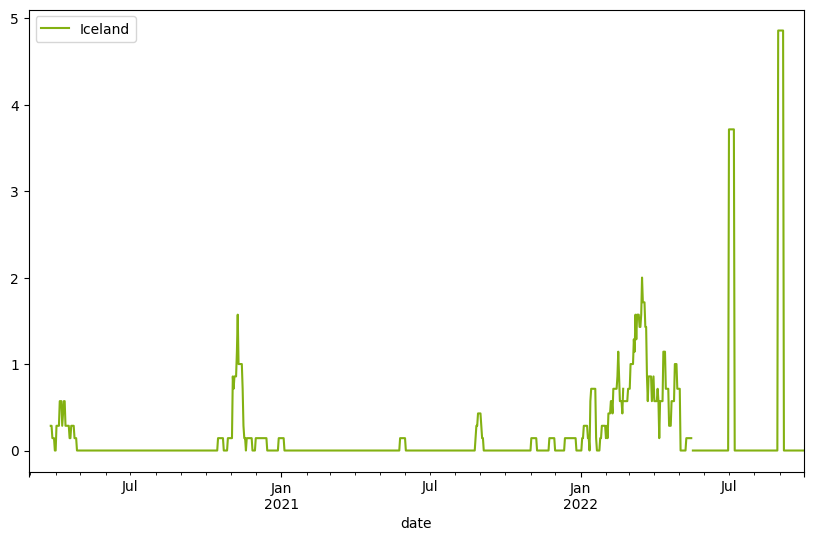

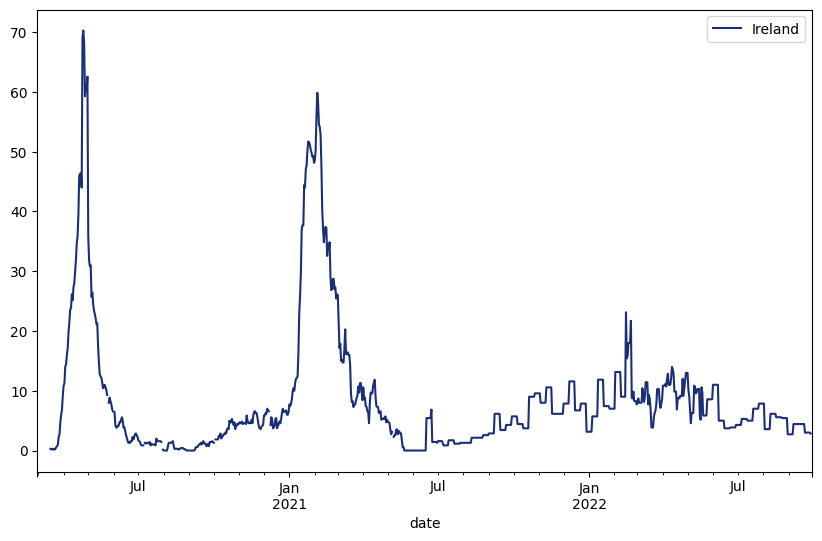

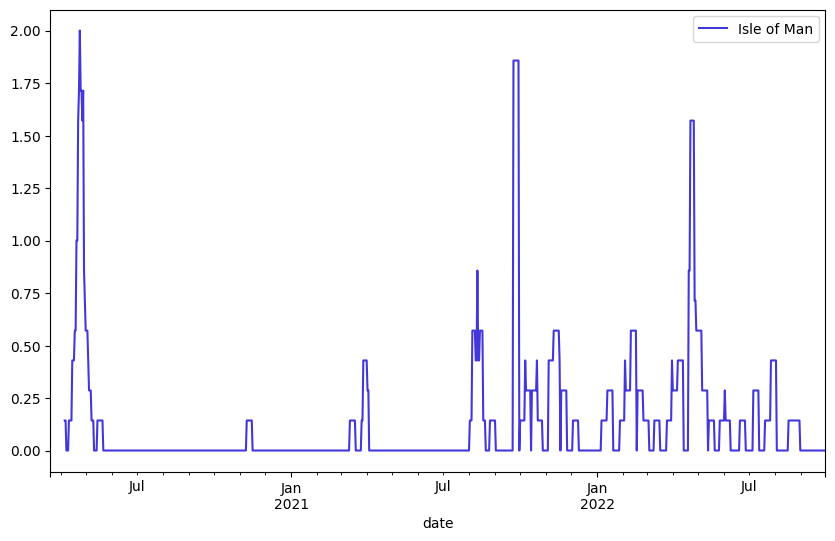

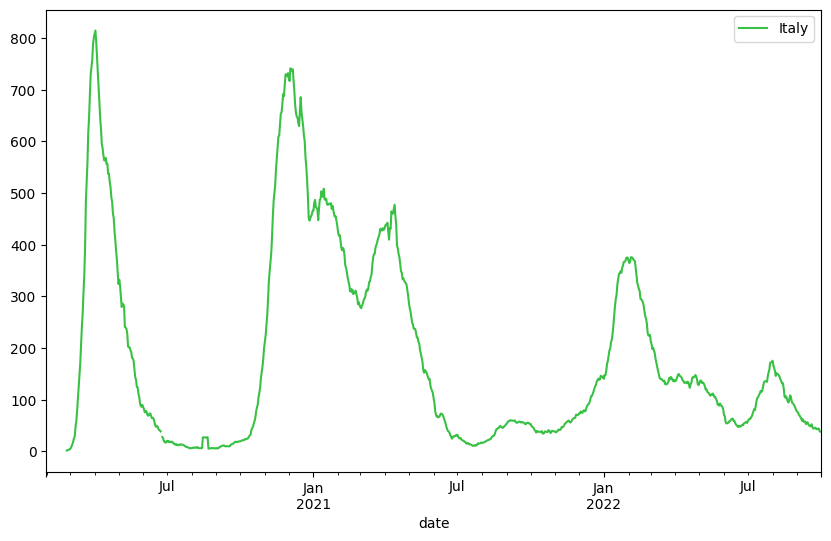

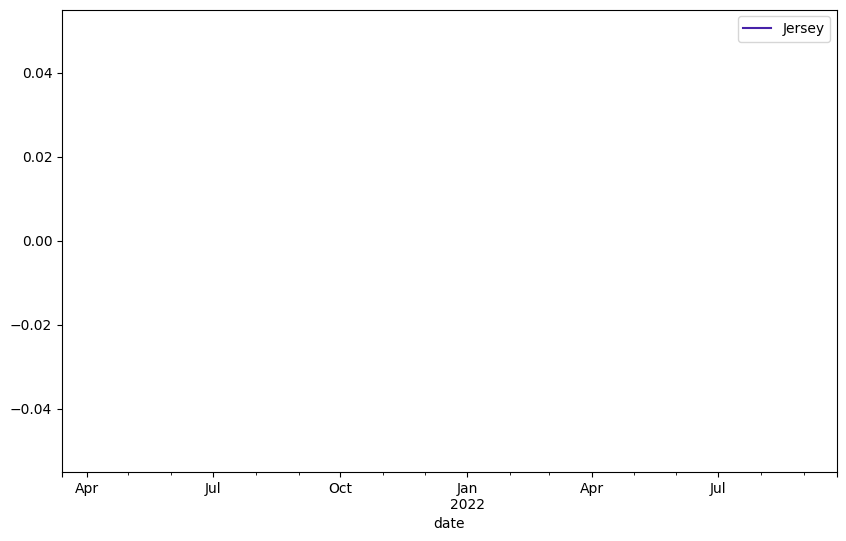

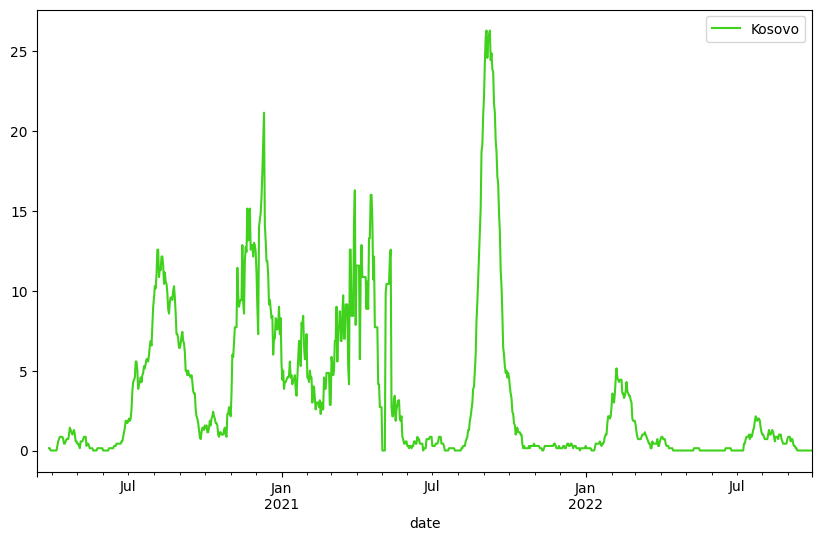

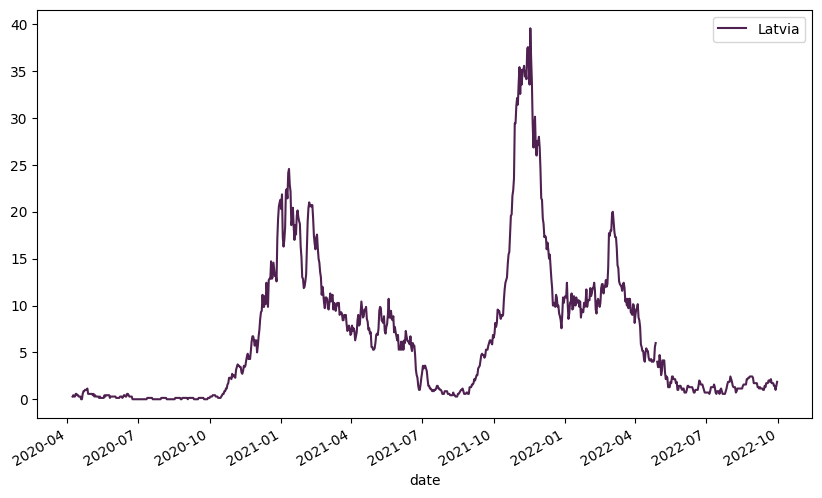

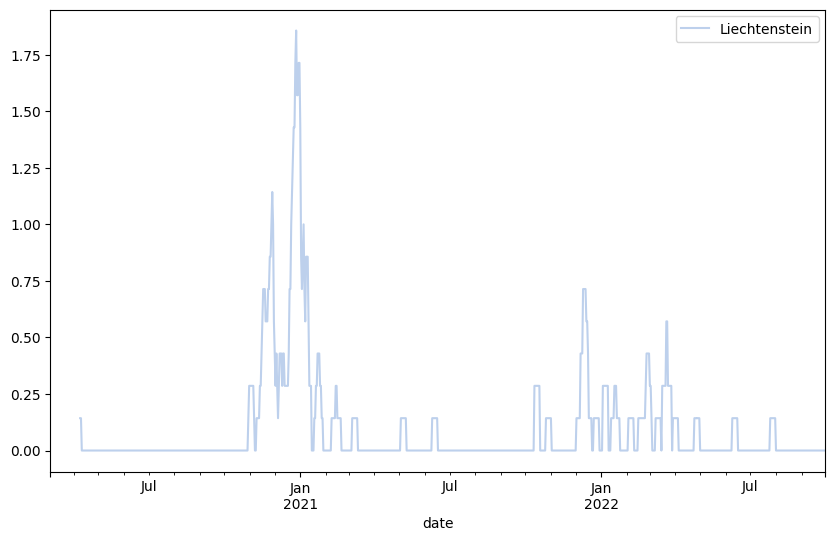

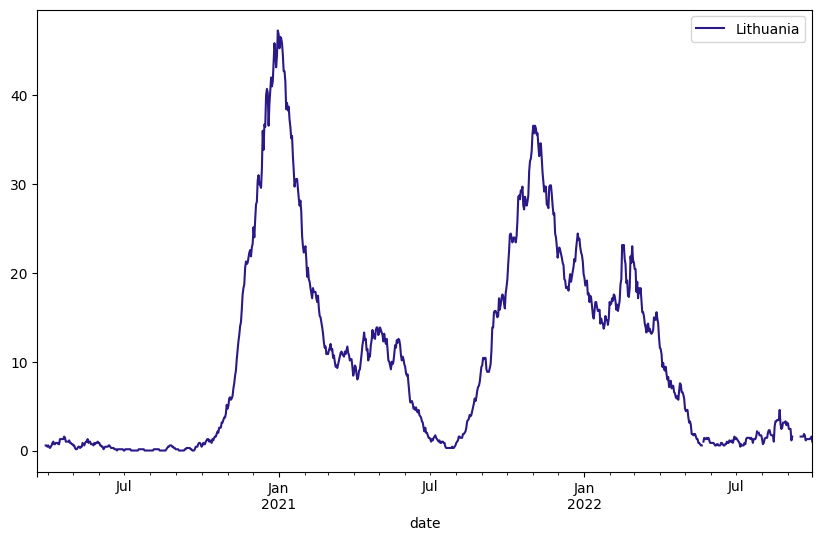

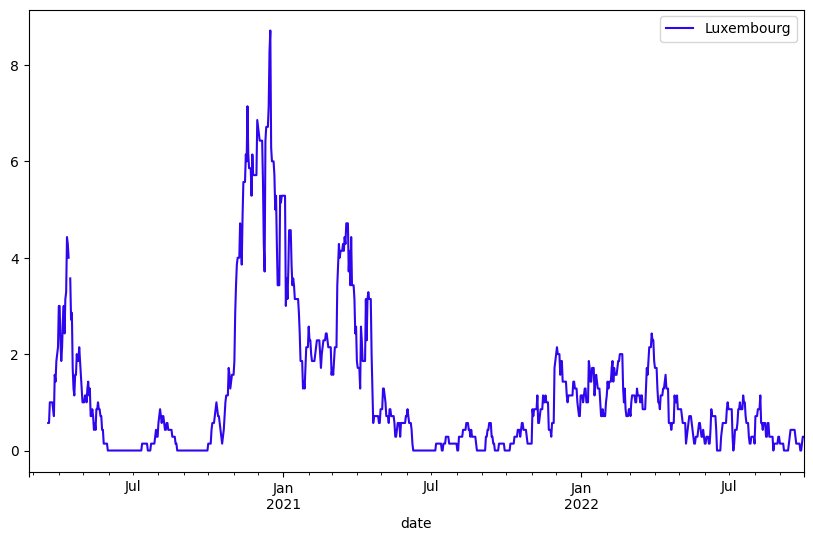

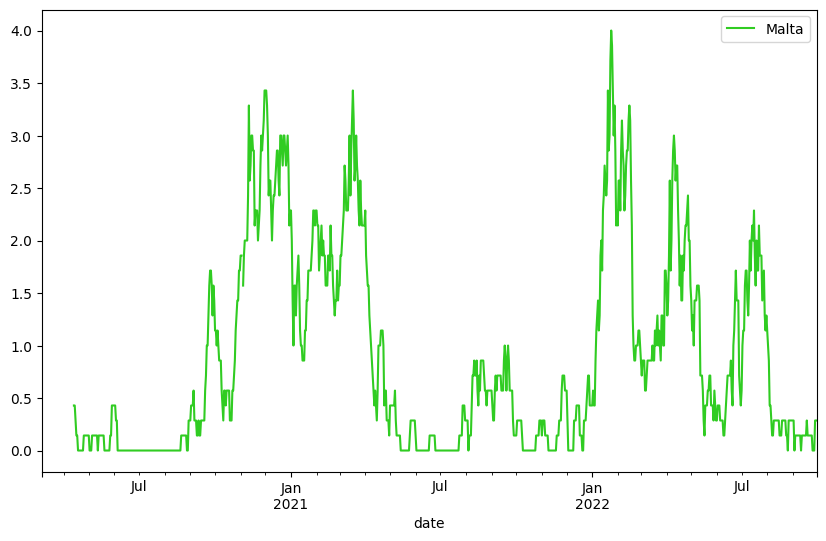

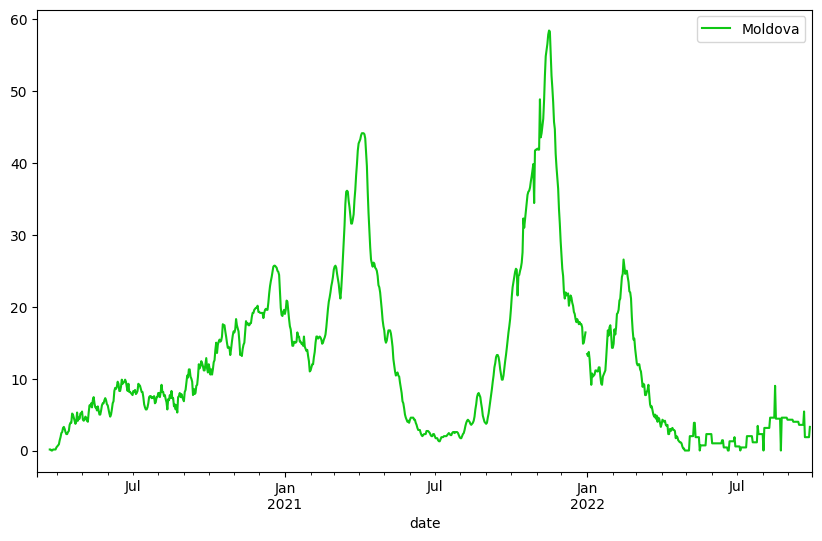

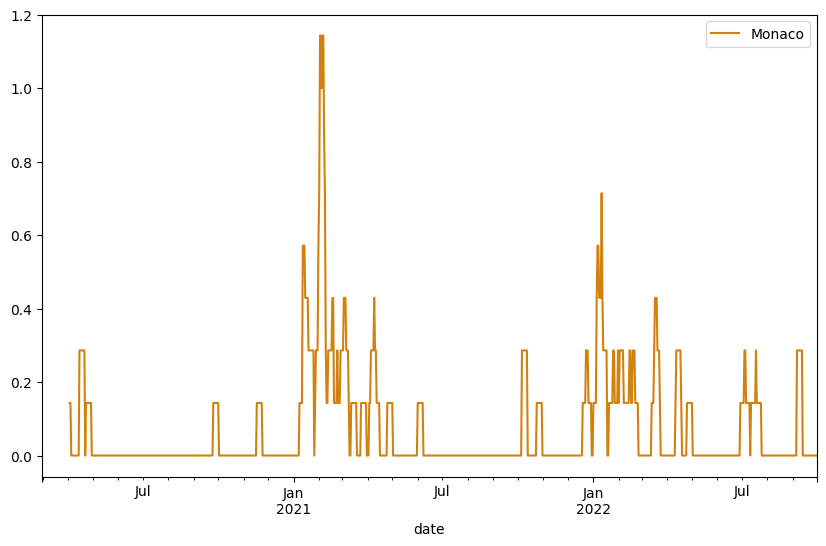

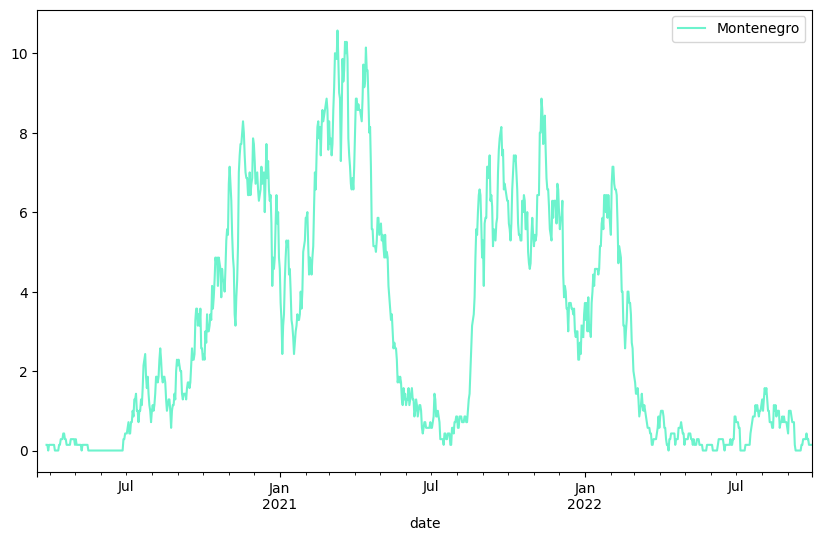

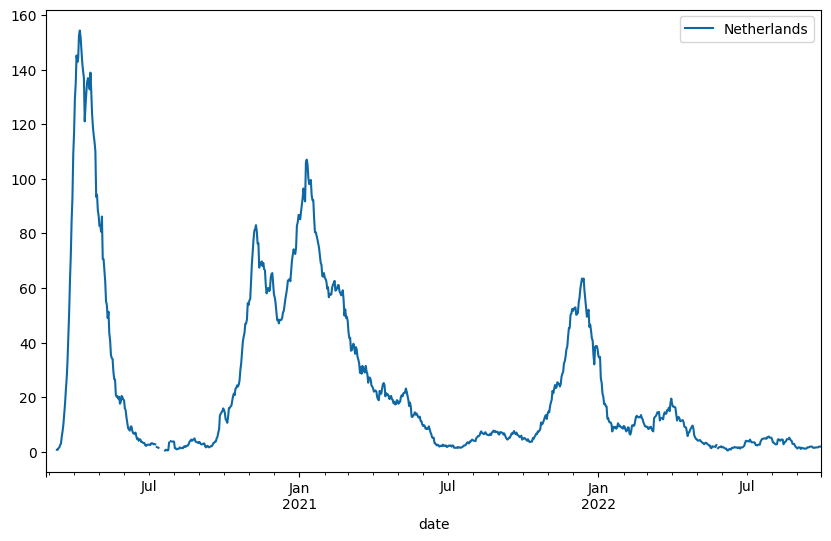

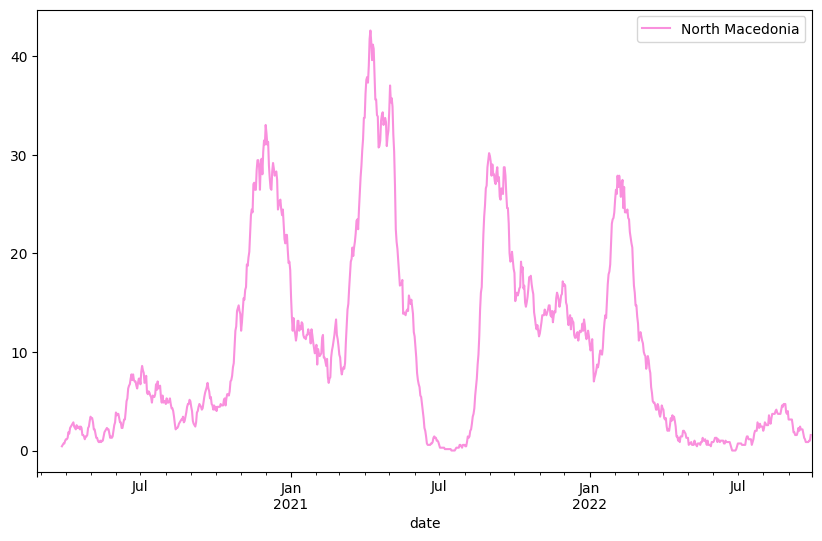

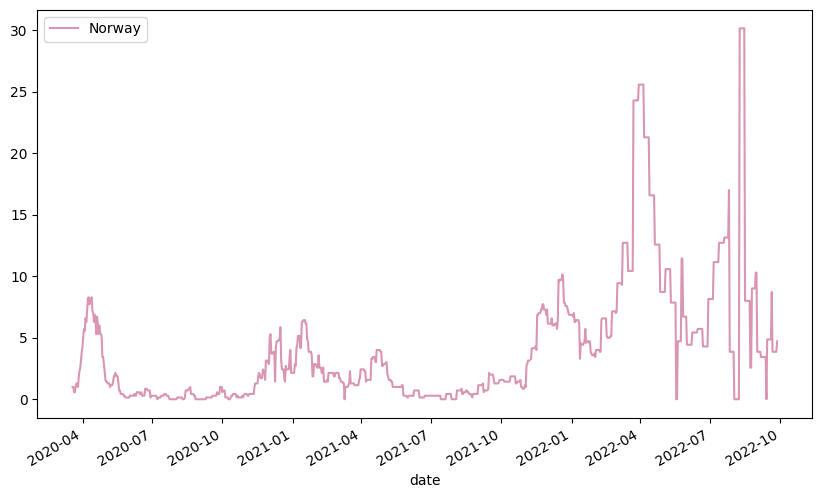

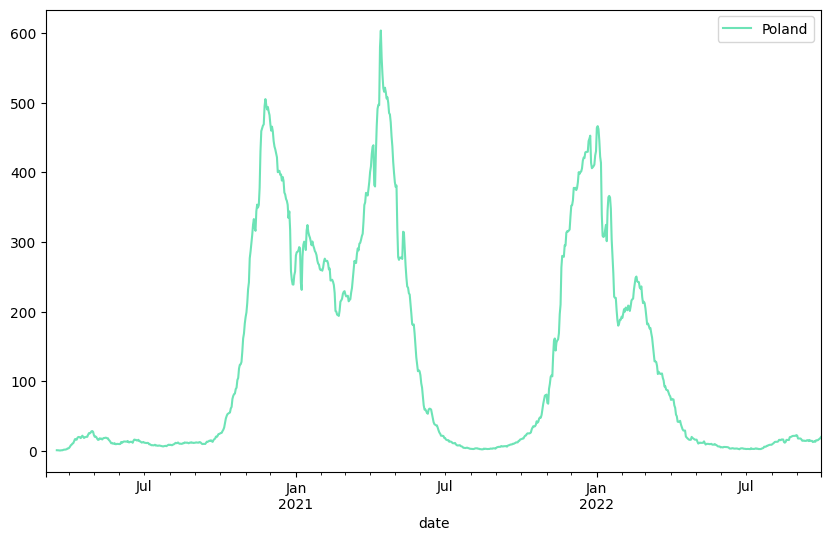

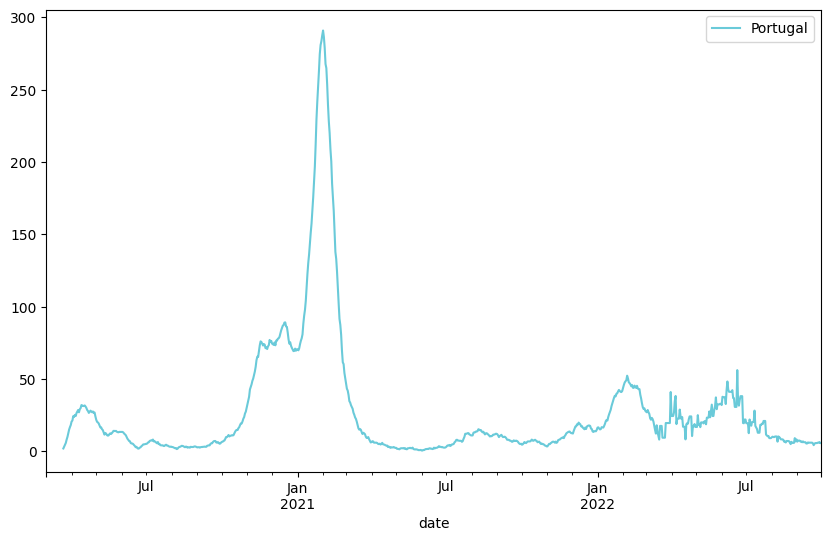

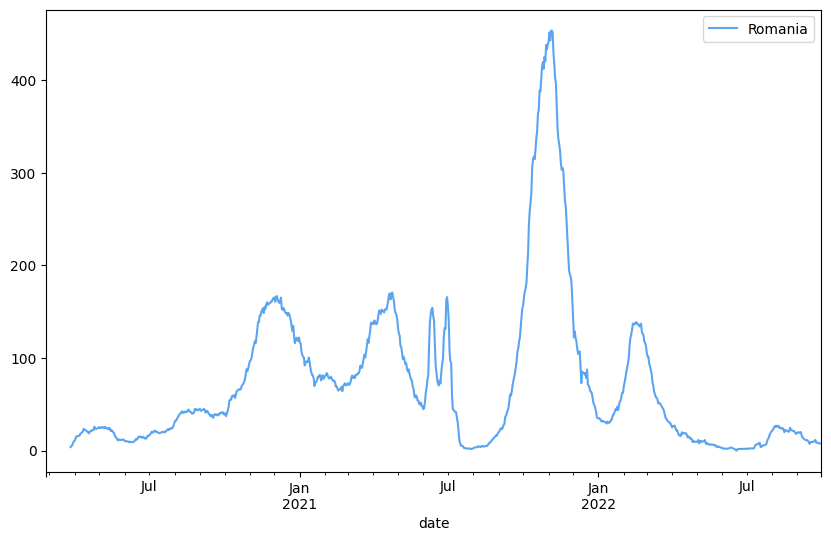

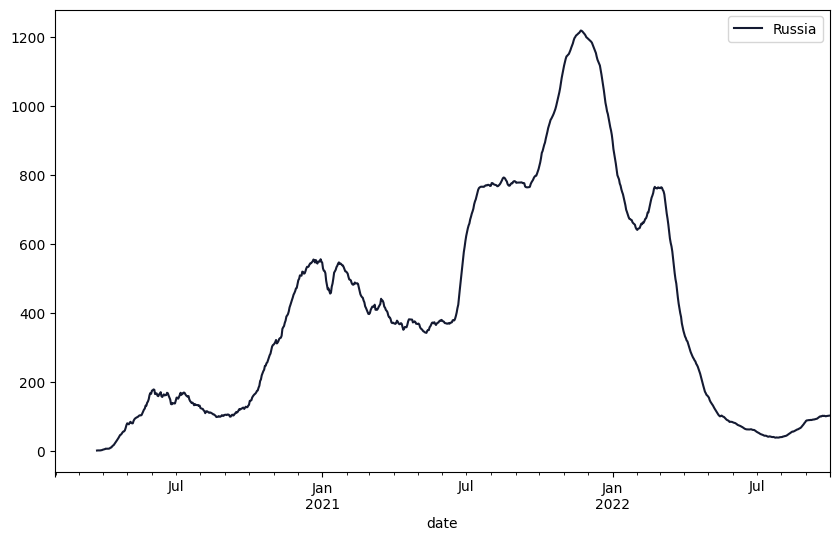

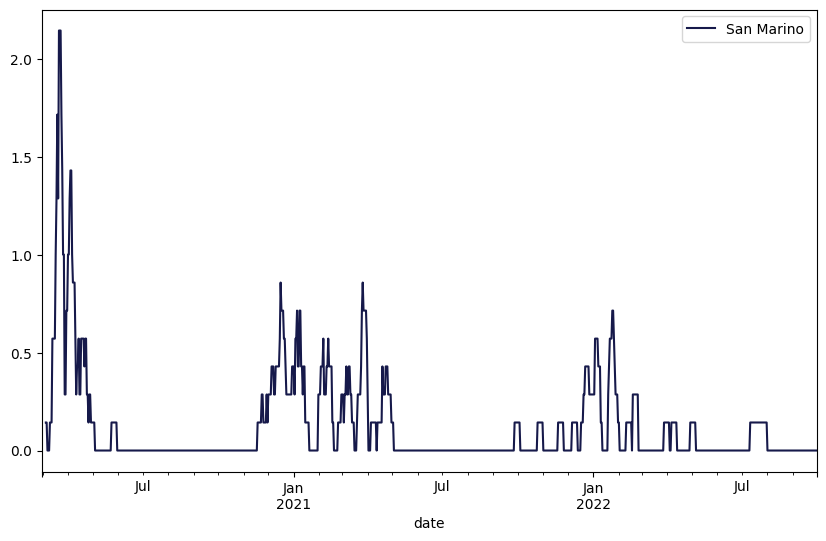

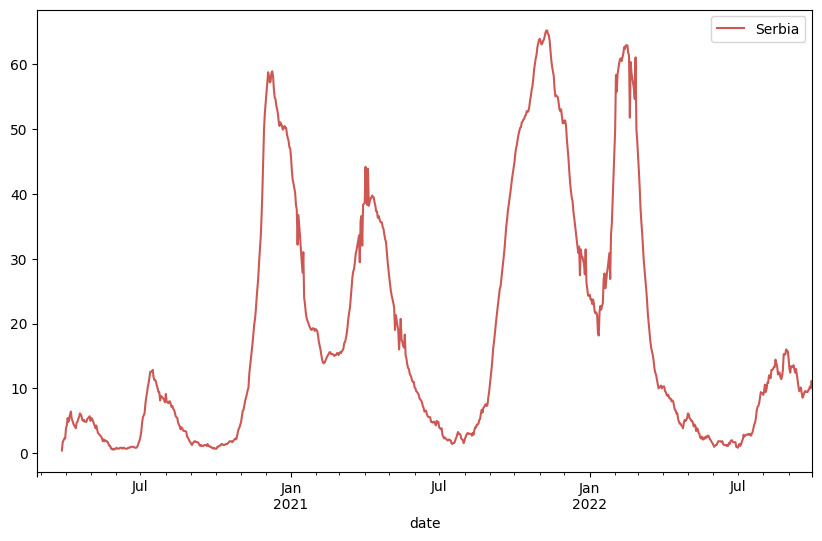

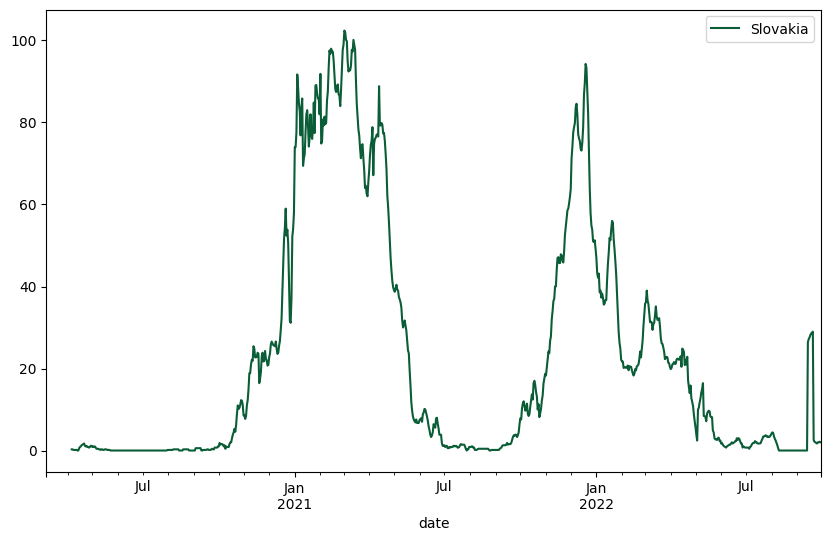

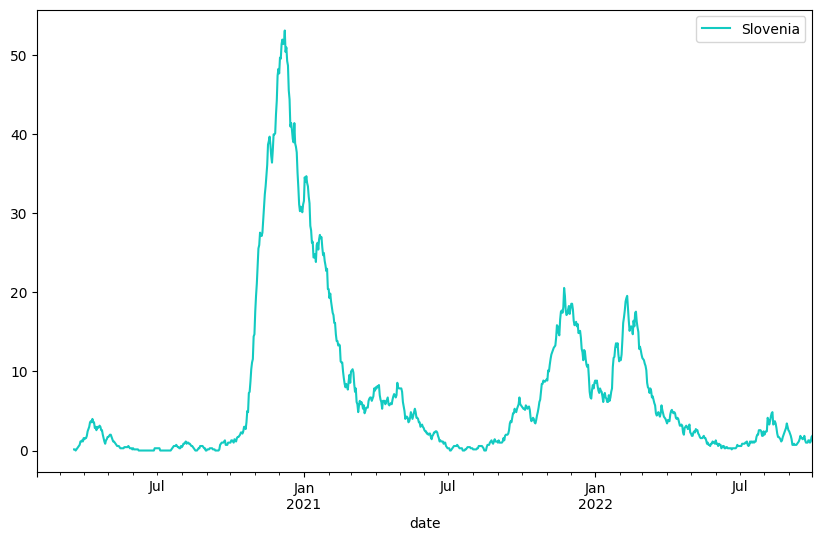

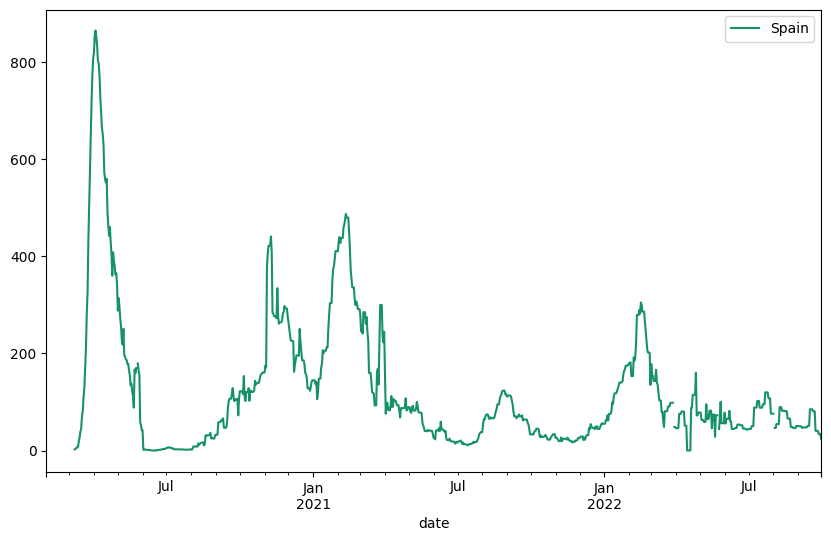

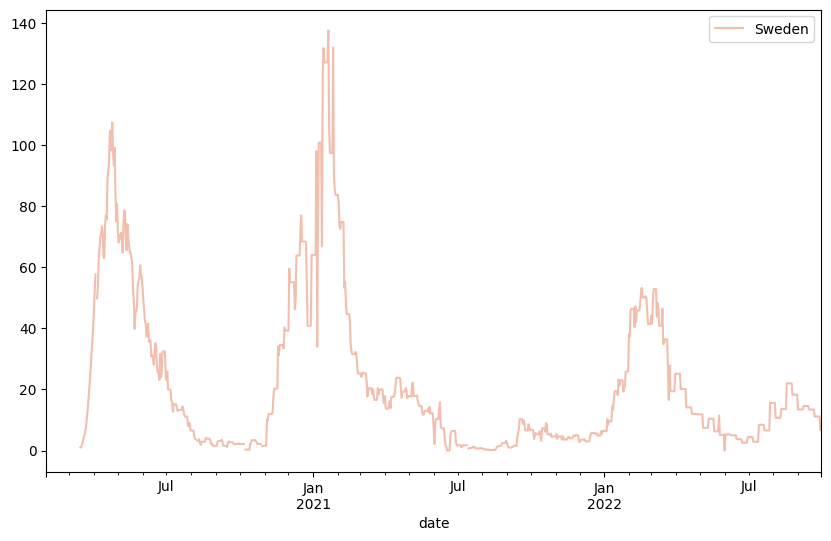

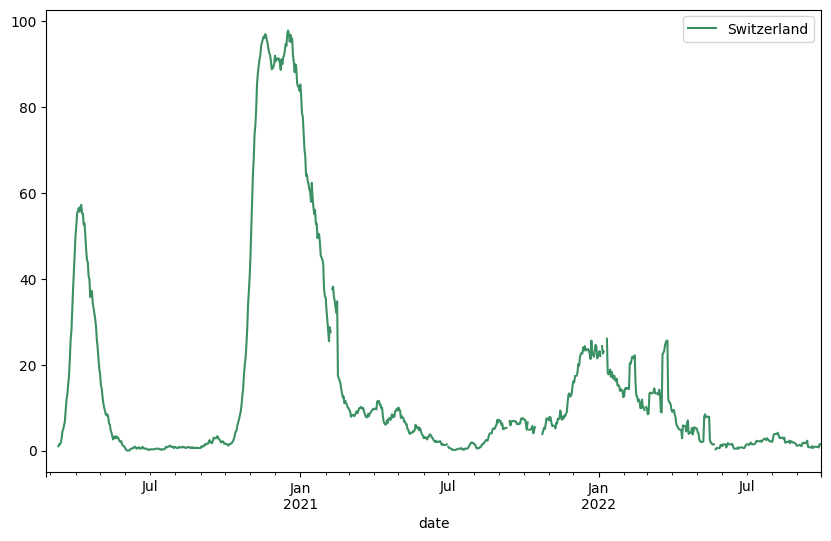

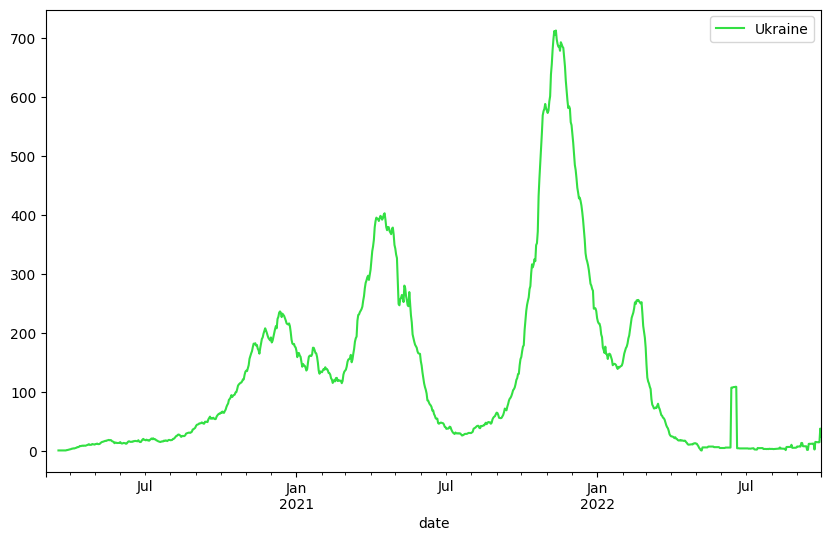

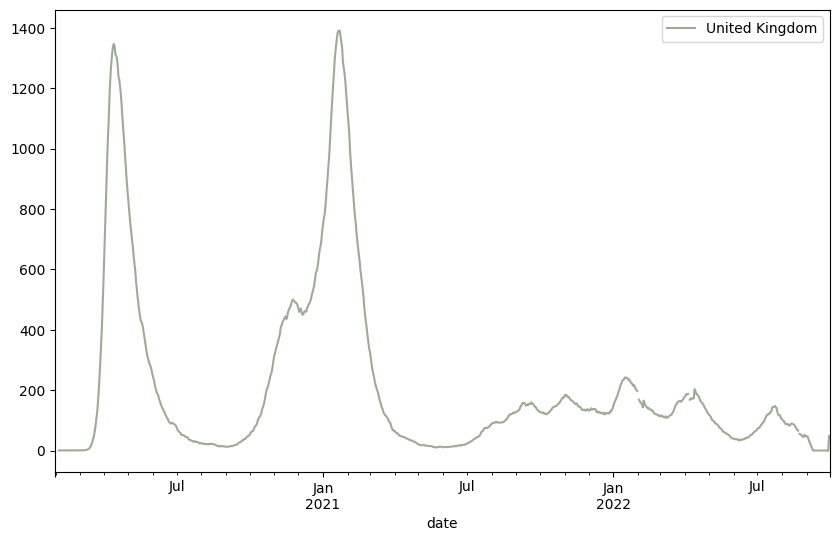

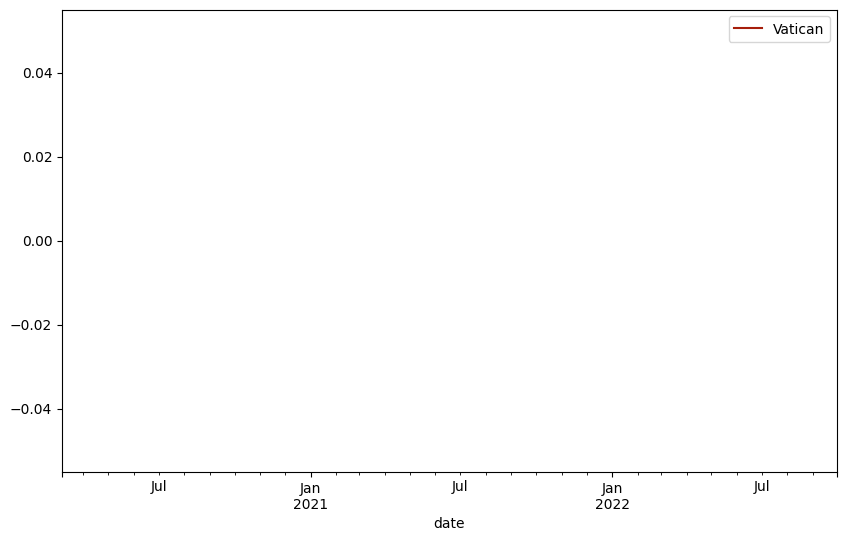

In [68]:
for i, (name, group) in enumerate(paises):
    color = (random.random(), random.random(), random.random());
    group.plot(x='date', y='new_deaths_smoothed', label=name, color = color,figsize=(10,6))

plt.legend()
plt.show()




### Analisis

##### En estos graficos podemos ver las nuevas muertes por dia en cada pais

# Grafico de maximos de testeos por pais 

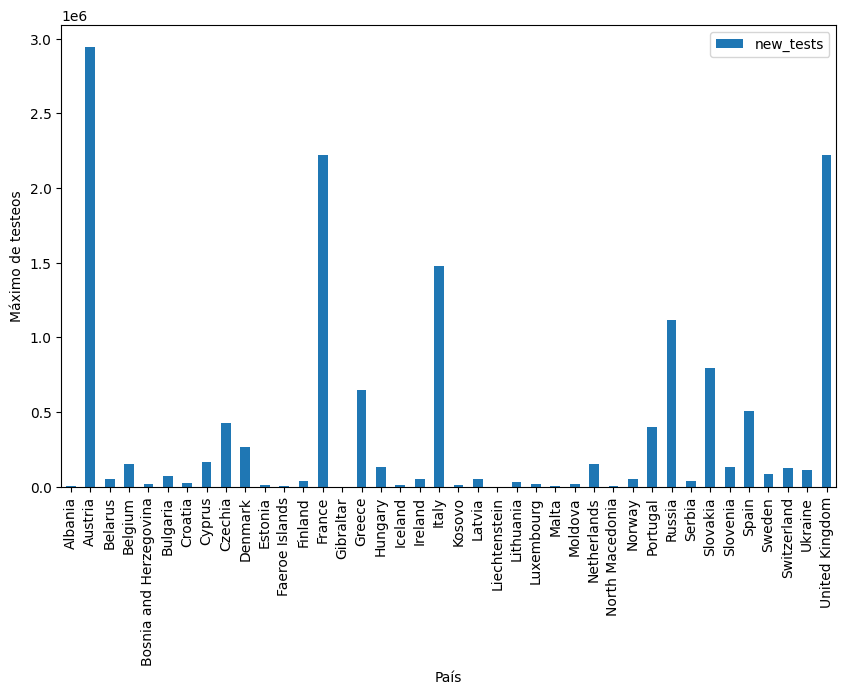

In [69]:

## excluyo los paises que no tiene datos de los nuevos testeos 
df2 = copy_df.dropna(subset=['new_tests'])

df_grouped = df2.groupby('location').max()

df_grouped.plot(kind='bar', y='new_tests',figsize=(10,6))
plt.xlabel('País')
plt.ylabel('Máximo de testeos')

plt.show()

En esta grafica podemos ver el maximo de testeos en un dia por pais en Europa

# Grafico barras de total de vacunados por pais

seaborn

C:\Users\Ignacio\AppData\Local\Temp\ipykernel_20932\3620284743.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_grouped = df3.groupby('location').max()


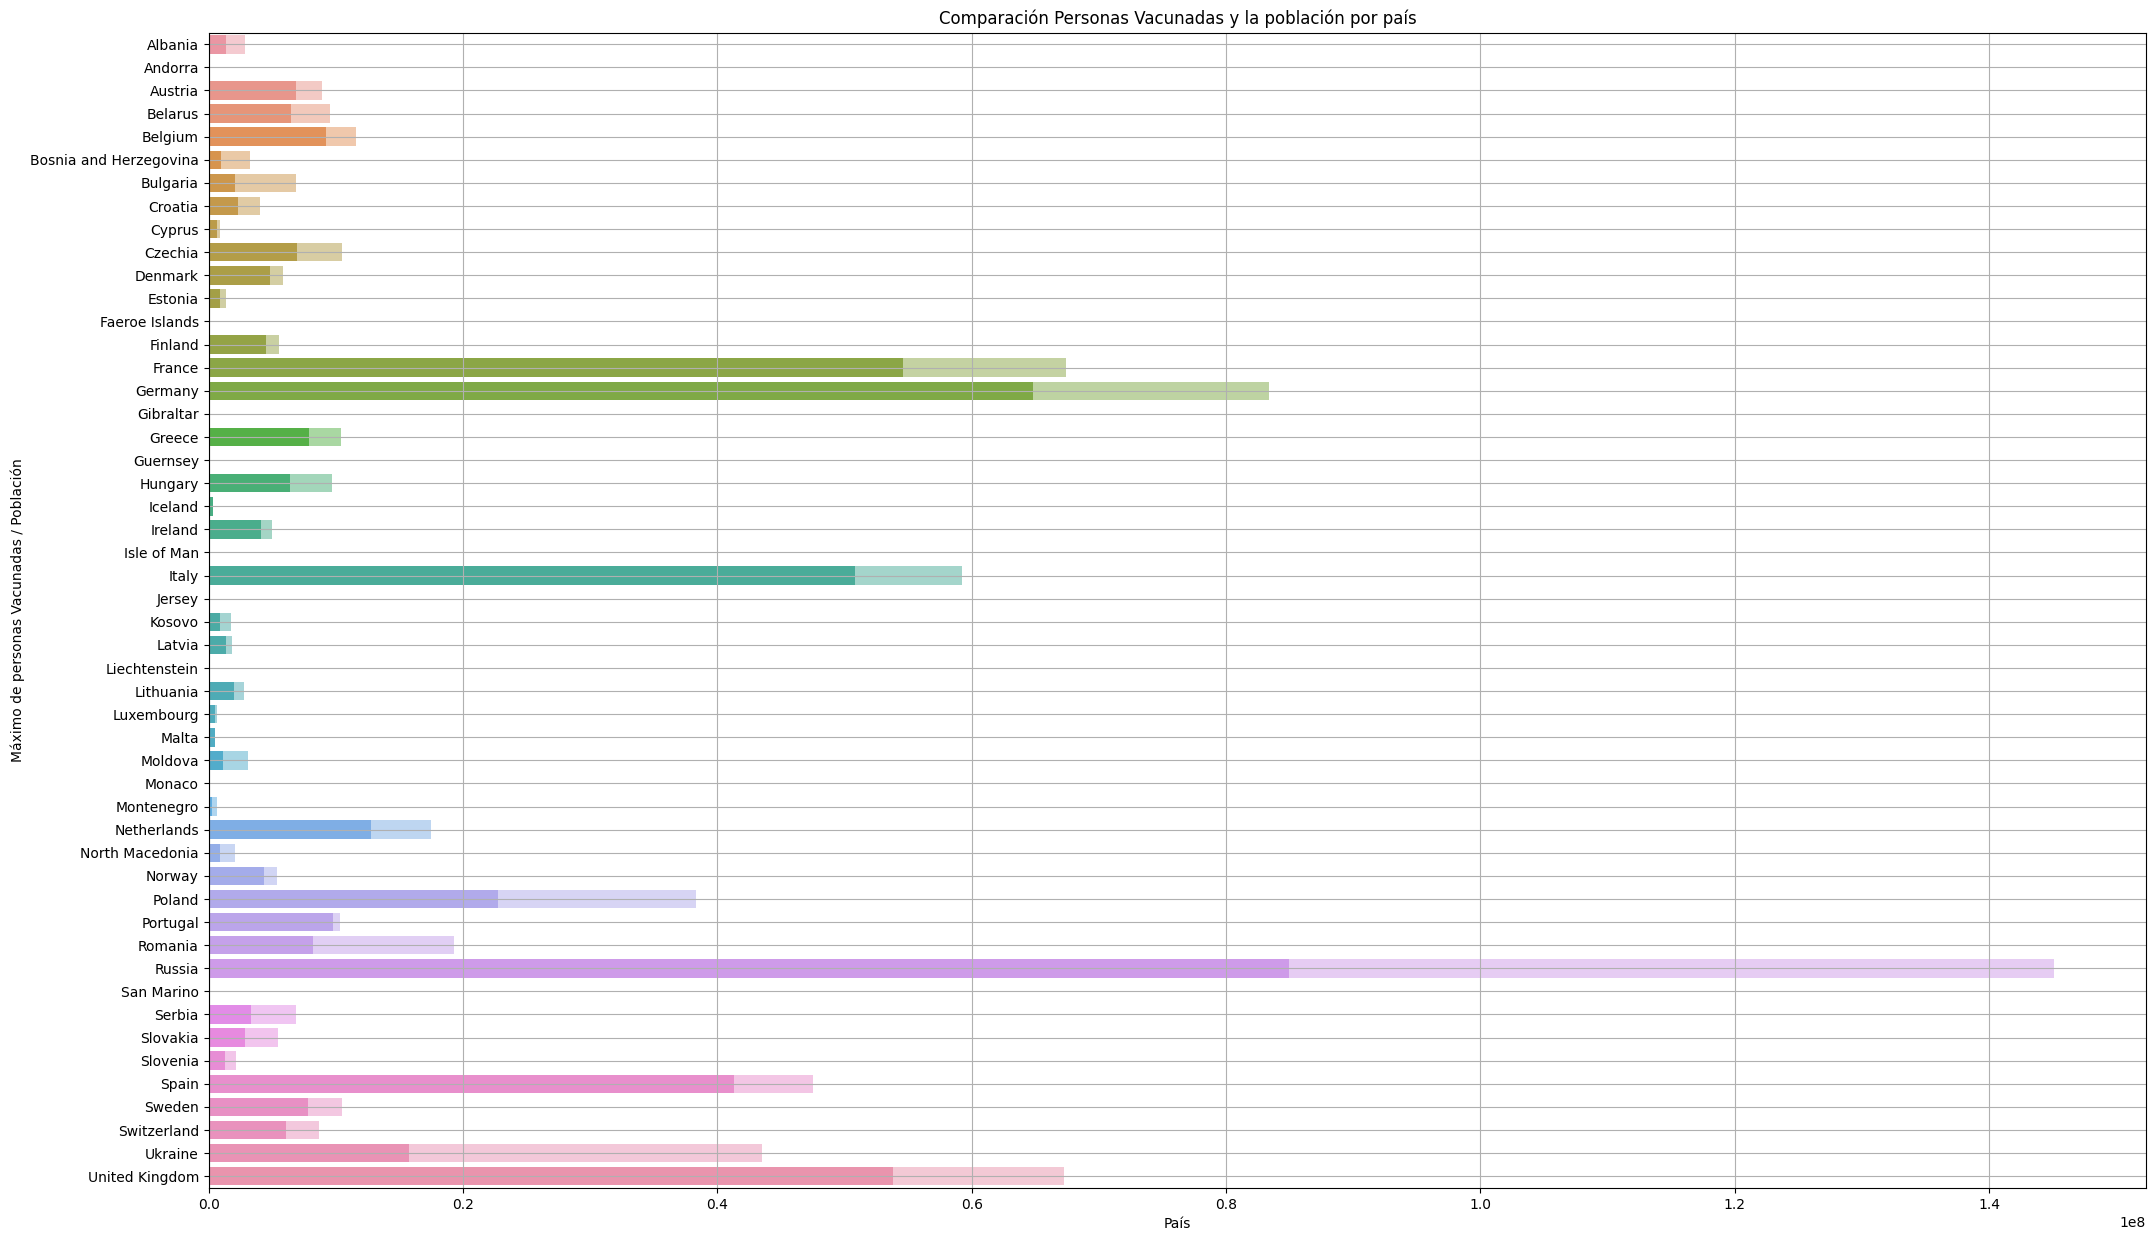

In [70]:
df3 = copy_df.dropna(subset=["people_vaccinated"])

plt.figure(figsize=(25,15))
df_grouped = df3.groupby('location').max()
sns.barplot(y=df_grouped.index, x='population', data=df_grouped,  alpha = 0.5)
sns.barplot(y=df_grouped.index, x='people_vaccinated', data=df_grouped )
plt.grid()
plt.xlabel('País')
plt.ylabel('Máximo de personas Vacunadas / Población')
plt.title('Comparación Personas Vacunadas y la población por país')
plt.show()

En este grafico podemos ver la comparativa entre el total de personas vacunadas y el total de la poblacion del los paises.

# Grafico de ingresos al hopital vs ingresos a terapia intesiva

seaborn

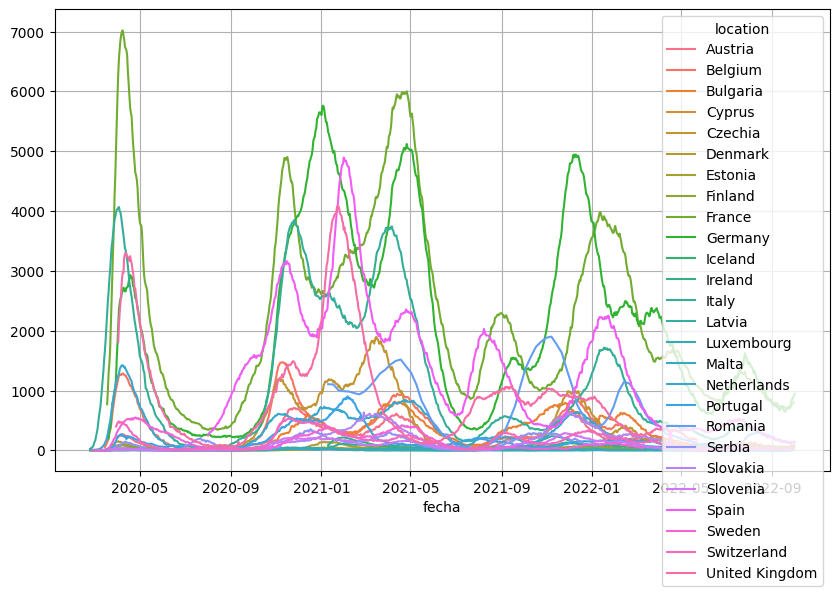

In [71]:
df3 = copy_df.dropna(subset=["icu_patients"])
#df4 = copy_df.dropna(subset=["hosp_patients"])

plt.figure(figsize=(10,6))


#sns.lineplot(x=df4['date'], y='hosp_patients', data=df4,hue='location')
sns.lineplot(x=df3['date'], y='icu_patients', data=df3, hue='location')
plt.grid()
plt.xlabel('fecha')
plt.ylabel('')
plt.title('')
plt.show()
#df3

Este grafico muestrs por fecha la cantidad de pacientes que ingresaron a la terapia intesiva por pais 

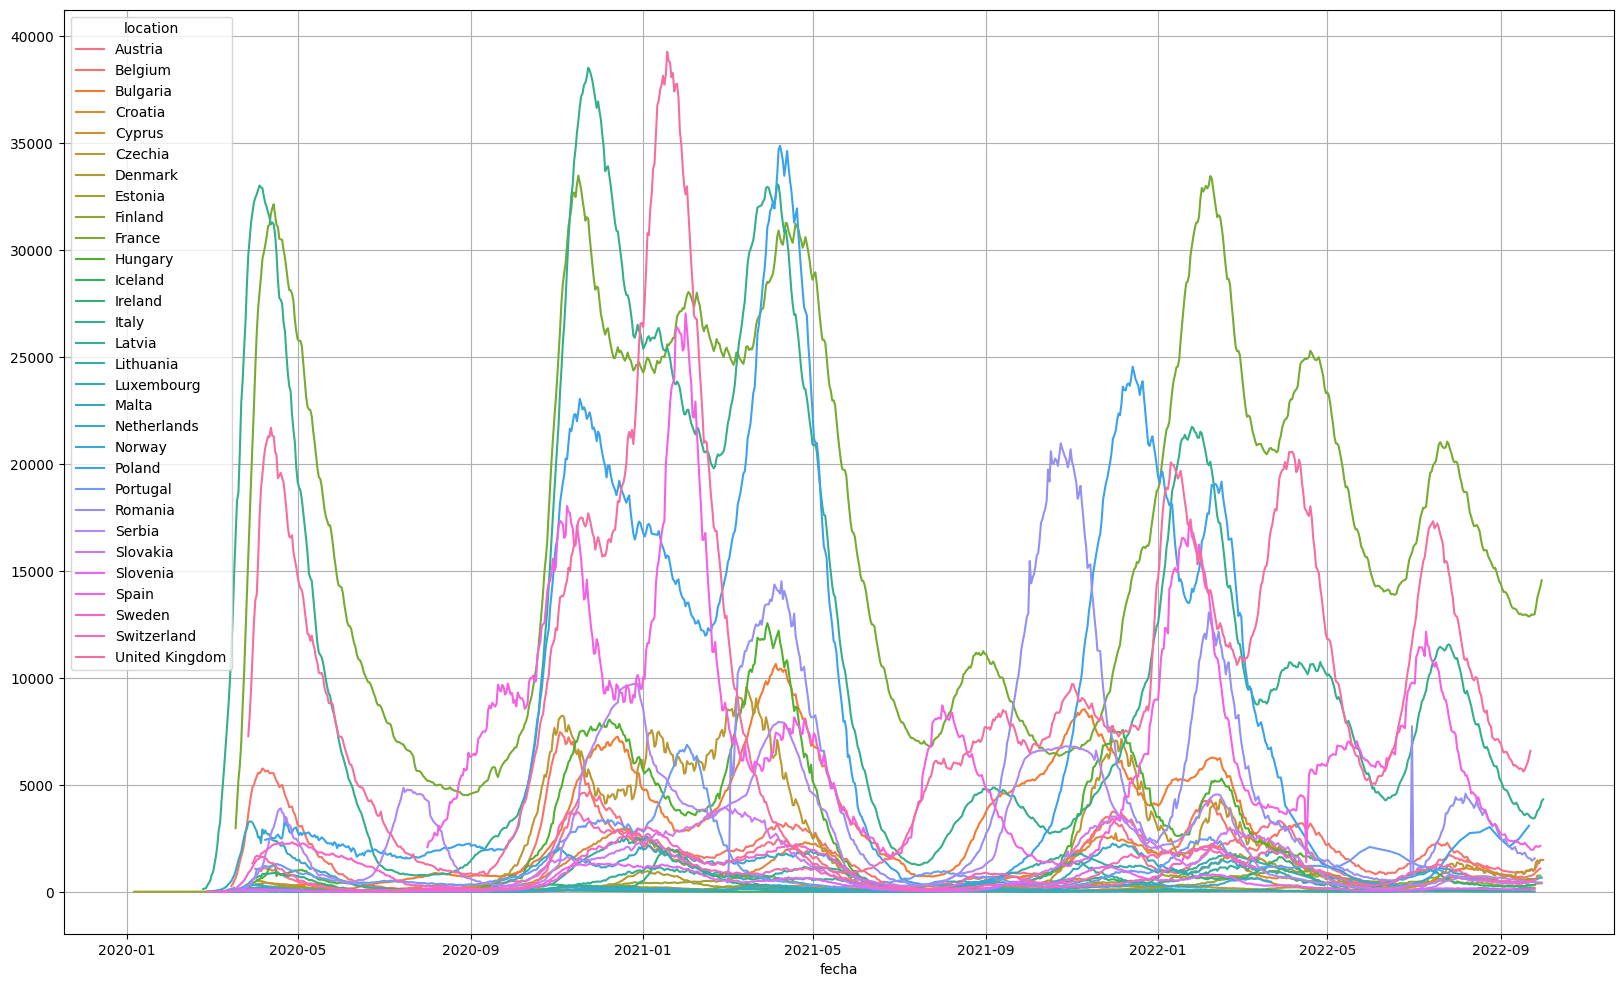

In [72]:
#df3 = copy_df.dropna(subset=["icu_patients"])
df4 = copy_df.dropna(subset=["hosp_patients"])

plt.figure(figsize=(20,12))


sns.lineplot(x=df4['date'], y='hosp_patients', data=df4,hue='location')
#sns.lineplot(x=df3['date'], y='icu_patients', data=df3, hue='location')
plt.grid()
plt.xlabel('fecha')
plt.ylabel('')
plt.title('')
plt.show()
#df3

Este grafico es similar al anterior pero muestra las personas que fueron solamente hospitalizadas

# Modelos 


# Modelo para predecir nuevos casos por pais 

In [73]:
# copia de la base de datos
copy_df = df.copy()

#convierto la coluna de fechas al formato de fecha 
copy_df['date'] = pd.to_datetime(copy_df['date'])

# Eliminar valores Nan
copy_df.replace('NaN',np.nan,inplace= True)

copy_df.fillna(0,inplace=True)

copy_df = copy_df.set_index('date')

# Agrupar por continentes
# continentes = copy_df.groupby("continent")

# Separo el contiente europeo que es con el que deseo trabaajar
df_europe = copy_df.query('continent in ["Europe"]')

df_asia = copy_df.query('continent in ["Asia"]')
# agrupo por paises la data
paises = copy_df.groupby("location")


copy_df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [74]:
modelE  = 'new_cases_smoothed~location + population + people_vaccinated  + people_fully_vaccinated  + hosp_patients + total_cases + reproduction_rate + total_tests + new_tests + life_expectancy + human_development_index + handwashing_facilities + gdp_per_capita + extreme_poverty'

lmE = sm.ols(formula=modelE , data= df_europe)

result = lmE.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     new_cases_smoothed   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1028.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:57:38   Log-Likelihood:            -5.1264e+05
No. Observations:               47659   AIC:                         1.025e+06
Df Residuals:                   47601   BIC:                         1.026e+06
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Modelo para predecir nuevas muertes por dia 

In [75]:
model2  = 'new_deaths_smoothed~location + new_cases + population + people_vaccinated  + people_fully_vaccinated  + hosp_patients + total_cases + reproduction_rate + total_tests + new_tests + life_expectancy + human_development_index + handwashing_facilities + gdp_per_capita + extreme_poverty'

lm2 = sm.ols(formula=model2 , data= copy_df)

result2 = lm2.fit()

print(result2.summary())

                             OLS Regression Results                            
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.788
Model:                             OLS   Adj. R-squared:                  0.788
Method:                  Least Squares   F-statistic:                     3268.
Date:                 Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                         18:57:48   Log-Likelihood:            -1.5775e+06
No. Observations:               220343   AIC:                         3.155e+06
Df Residuals:                   220091   BIC:                         3.158e+06
Df Model:                          251                                         
Covariance Type:             nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------